# DS 150 Capstone

# Setup for project

First Mount your drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import time
from ast import literal_eval
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS 150 Capstone/games_march2025_cleaned.csv')

# Exploratory Data

Read the initial csv

In [ ]:
print(df.head())

    appid                             name release_date  required_age  price  \
0     730                 Counter-Strike 2   2012-08-21             0   0.00   
1  578080              PUBG: BATTLEGROUNDS   2017-12-21             0   0.00   
2     570                           Dota 2   2013-07-09             0   0.00   
3  271590        Grand Theft Auto V Legacy   2015-04-13            17   0.00   
4  359550  Tom Clancy's Rainbow Six® Siege   2015-12-01            17   3.99   

   dlc_count                               detailed_description  \
0          1  For over two decades, Counter-Strike has offer...   
1          0  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2          2  The most-played game on Steam. Every day, mill...   
3          0  When a young street hustler, a retired bank ro...   
4          9  Edition Comparison Ultimate Edition The Tom Cl...   

                                      about_the_game  \
0  For over two decades, Counter-Strike has offer...   
1  L

In [ ]:
df.columns

Index(['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'discount',
       'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total',
       'pct_pos_recent', 'num_reviews_recent'],
      dtype='object')

In [ ]:
print(f"Mean of Price: {df['price'].mean()}")
print(f"Max of Price: {df['price'].max()}")
print(f"Std of Price: {df['price'].std()}")

Mean of Price: 7.3096226204557135
Max of Price: 999.98
Std of Price: 13.331073254511136


In [ ]:
df['release_year'] = df['release_date'].str[0:4]
print(df['release_year'])
df['release_month'] = df['release_date'].str.split('-').str[1]
print(df['release_month'])

0        2012
1        2017
2        2013
3        2015
4        2015
         ... 
89613    2024
89614    2020
89615    2019
89616    2025
89617    2018
Name: release_year, Length: 89618, dtype: object
0        08
1        12
2        07
3        04
4        12
         ..
89613    02
89614    01
89615    10
89616    01
89617    03
Name: release_month, Length: 89618, dtype: object


In [ ]:
# Define the mapping from month number (string) to month name
month_map = {
    '01': 'January', '02': 'February', '03': 'March',
    '04': 'April', '05': 'May', '06': 'June',
    '07': 'July', '08': 'August', '09': 'September',
    '10': 'October', '11': 'November', '12': 'December'
}

df['release_month'] = df['release_month'].astype(str)
df['release_month_name'] = df['release_month'].map(month_map)
month_names_ordered = list(month_map.values())
df['release_month_name'] = pd.Categorical(
    df['release_month_name'],
    categories=month_names_ordered,
    ordered=True
)

print(df[['release_month', 'release_month_name']])

      release_month release_month_name
0                08             August
1                12           December
2                07               July
3                04              April
4                12           December
...             ...                ...
89613            02           February
89614            01            January
89615            10            October
89616            01            January
89617            03              March

[89618 rows x 2 columns]


In [ ]:
print(f"Average price: {df['price'].mean()}")
print(f"Std deviation of price: {df['price'].std()}")
print(f"Average price by year: {df.groupby('release_year')['price'].mean()}")

Average price: 7.3096226204557135
Std deviation of price: 13.331073254511136
Average price by year: release_year
1997     4.995000
1999     4.990000
2001    19.990000
2002    14.990000
2003    16.490000
2004     4.995000
2005    14.240000
2006     8.545556
2007     9.991250
2008    11.134286
2009     9.292857
2010     8.120793
2011     9.046179
2012    10.160744
2013    10.548739
2014     8.846125
2015     7.582951
2016     7.174445
2017     6.776536
2018     6.329825
2019     7.209094
2020     6.629383
2021     7.583537
2022     7.679181
2023     7.427601
2024     7.460578
2025     7.703501
Name: price, dtype: float64


There are quite a few free games in steam, lets remove these.

In [ ]:
df['paid_games_price'] = df[df['price'] != 0]['price']

print(f"Average price: {df['paid_games_price'].mean()}")
print(f"Std deviation of price: {df['paid_games_price'].std()}")
print(f"Average price by year: {df.groupby('release_year')['paid_games_price'].mean()}")

Average price: 8.681302976490235
Std deviation of price: 14.112378907580139
Average price by year: release_year
1997     9.990000
1999     4.990000
2001    19.990000
2002    14.990000
2003    16.490000
2004     9.990000
2005    14.240000
2006     8.545556
2007    11.418571
2008    12.990000
2009     9.757500
2010     8.938322
2011     9.988490
2012    11.375616
2013    11.692578
2014     9.635957
2015     8.538017
2016     8.364823
2017     7.983335
2018     7.528426
2019     8.502608
2020     7.916453
2021     8.931818
2022     9.269268
2023     8.907666
2024     9.016611
2025     9.051171
Name: paid_games_price, dtype: float64


# Functions

In [ ]:
def set_buckets(df, targetcolumn, bucketcount, bucketsize):
    """
    This functions accepts a dataframe, sorting a numerical column into buckets
    based on a given count and size for the buckets. It will return a dictionary
    categorized by the bucket ranges, including all values from the dataframe's
    column that fit inside that range.
    """
    buckets = {}

    for i in range(bucketcount):
        #set upper and lower bucket ranges
        lower_bucket = i * bucketsize
        upper_bucket = lower_bucket + bucketsize

        #add matching dataframe values to bucket dict
        buckets[f'{lower_bucket}-{upper_bucket-1}'] = df[(df[targetcolumn] >= lower_bucket) & (df[targetcolumn] < upper_bucket)][targetcolumn]

    return buckets

In [ ]:
def add_buckets(df, targetcolumn, bucketcount, bucketsize):
    """
    This function targets a numerical column, filtering the values
    into a bucket and adding that bucket's value to a new column
    containing the bucket grouping. It returns a new dataframe
    with the added bucket column.
    """

    #create a copy of passed dataframe to avoid overwriting
    df_buckets = df.copy()

    for i in range(bucketcount):
        #find upper and lower bucket bounds
        lower_bucket = i * bucketsize
        upper_bucket = lower_bucket + bucketsize

        #find all rows of given column within bucket range
        matches = (df[targetcolumn] >= lower_bucket) & (df[targetcolumn] < upper_bucket)

        #create bucket label
        bucket = f'{lower_bucket}-{upper_bucket-1}'

        #add bucket label to new column
        df_buckets.loc[matches, 'bucket'] = bucket

    #return new dataframe with added bucket column
    return df_buckets

In [ ]:
def filter_outliers(df, targetcolumns):
    """
    This function filters outliers from a given column in
    a dataframe. It returns a fitlered dataframe without
    the rows containing the outliers from the selected
    column.
    """
    if isinstance(df, pd.DataFrame):
      for targetcolumn in targetcolumns:
        #find q1, q3, and iqr
        q1 = df[targetcolumn].quantile(0.25)
        q3 = df[targetcolumn].quantile(0.75)
        iqr = q3 - q1

        #find upper and lower bonds for outliers
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        # Set dataframe to range

        df[targetcolumn] = np.where(df[targetcolumn] < lower, lower, df[targetcolumn])
        df[targetcolumn] = np.where(df[targetcolumn] > upper, upper, df[targetcolumn])

      return df

    else:
      print("Failed to filter outliers due to an unknown issue.")


In [ ]:
'''
Linear Regression function usage lin_reg(numpy array 1, numpy array 2, print_data=True/False)
For this to work it needs to be passed a numpy array.
You can do this to a column by using df['col'].to_numpy().reshape(-1,1) for x and df['col'].to_numpy() for y.

Linear Regression function returns a predicted price based on single linear regression.
You can also choose to print the extra data such as coefficitent of determination by entering true or false for extra data.
'''
def lin_reg(x, y, print_data=False):
  model = LinearRegression()

  model.fit(x, y)

  model = LinearRegression().fit(x, y)

  r_sq = model.score(x, y)

  if print_data == True:
    print(f"coefficient of determination: {r_sq}")

    print(f"intercept: {model.intercept_}")

    print(f"slope: {model.coef_}")

  new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
  if print_data == True:
    print(f"intercept: {new_model.intercept_}")
    print(f"slope: {new_model.coef_}")

  y_pred = model.predict(x)
  print(f"predicted response:\n{y_pred}")
  #y_pred = model.intercept_ + model.coef_ * x
  #print(f"predicted response:\n{y_pred}")

In [ ]:
'''
The capping_data(), the capping_data() function takes a df, columnname, lower or upper bound
'''

def capping_data(df, columnname, lower=None, upper=None):
  if lower is None and upper is None:
    print('No Lower or Upper bounds specified. Why did you call me? Here is your unfiltered dataframe back.')
    return df

  filtered_df = df.copy()
  if upper is not None:
        filtered_df[columnname] = np.where(
            filtered_df[columnname] > upper,
            upper,
            filtered_df[columnname]
        )
  if lower is not None:
      filtered_df[columnname] = np.where(
          filtered_df[columnname] < lower,
          lower,
          filtered_df[columnname]
      )



  return filtered_df

In [ ]:
'''
Multiple Linear regression function usage mult_lin_reg(df, predictors, y, print_data=False)

df - Pass a dataframe for us to pull values from
predictors - give a list of columns that you want to use for predictions
y - What we want to predict
print_data - By default false, will print out extra data, like R^2 value, slope, intercept, etc.
'''

def mult_lin_reg(df, predictors, y, print_data=False):
  X_mlr = df[predictors].values

  mlr_model = LinearRegression()
  mlr_model.fit(X_mlr, y)

  r_sq_mlr = mlr_model.score(X_mlr, y)

  if print_data == True:
    print(f"R-squared for MLR: {r_sq_mlr:.4f}")
    print(f"Intercept: {mlr_model.intercept_:.4f}")
    print(f"Slopes (Coefficients): {mlr_model.coef_}")

  y_pred = mlr_model.predict(X_mlr)

  predicted_prices_original_scale = pt.inverse_transform(y_pred.reshape(-1, 1))
  print(f"\nFirst 5 Predicted Prices (in currency):\n{predicted_prices_original_scale[:5].flatten()}")

In [ ]:
'''
log_trans() funtion takes a data frame and column, this function uses the Yeo-Johnson log transformation which finds the optimal lambda to transform the data.
Once it finds the optimal lambda to transform the transform the dataset, it will transform the data set and return the dataframe to you
'''

def log_trans(df, column_names):
  for column_name in column_names:
    X = df[column_name].values.reshape(-1,1)
    pt = PowerTransformer(method = 'yeo-johnson', standardize=True)
    data_transformed = pt.fit_transform(X)
    optimal_lambda = pt.lambdas_[0]
    print(f'Optimal Lambda found: {optimal_lambda:.4f}')
    df[f'{column_name}_transformed'] = pd.Series(data_transformed.flatten())

  return df

In [ ]:
"""
This function creates a linear regression model for categorical predictor variables.

Function parameters (dtype):
df - Pandas DataFrame (pd.DataFrame)
category_column - a column containing strings of categories you want to use for prediction (str)
target_column - a numerical column you want to predict (str)
agg_func - the aggregate function you want to you on grouped data (str)
contains_list - boolean whether or not the categorical column contains a list for each entry, default is false (bool)
print_r2 - boolean whether or not you want to print r2 score and root mean squared error, default is false (bool)

This function includes all imports that need to be used.
Returns a dataframe containing each individual category, the predicted value for the target column, and the actual aggregated value.

***Note: Do NOT pass any df that has used group_by()***
"""
def lin_reg_cat(df, category_column, target_column, agg_func, contains_list=False, print_r2=False):
    import pandas as pd
    from ast import literal_eval
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, root_mean_squared_error

    #copy passed df to avoid changing original df
    df_dummy = df.copy()

    #if categoruy column is a list of values, separate list by value and explode df
    if contains_list:
        df_dummy[category_column] = df_dummy[category_column].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)
        df_dummy = df_dummy.explode(category_column)

    #filter df to only needed columns and drop any na values from df to avoid training errors
    df_dummy = df_dummy[[category_column, target_column]].dropna()

    #separate X and y for df training
    X = pd.get_dummies(df_dummy[[category_column]], drop_first=False, dtype=int)
    y = df_dummy[target_column]

    #train data and fit lm
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = LinearRegression()
    model.fit(X_train, y_train)

    #print r2 and error if needed
    if print_r2:
        y_pred_test = model.predict(X_test)
        print("R2 Value:", r2_score(y_test, y_pred_test))
        print("Root Mean Squared Error:", root_mean_squared_error(y_test, y_pred_test))

    #create new df to sort by category in predictions
    categories = df_dummy[category_column].unique()
    df_cat = pd.DataFrame({category_column: categories})
    X_cat = pd.get_dummies(df_cat, drop_first=False, dtype=int)

    #align categories with predicted values, fill any columns not used with 0
    X_cat = X_cat.reindex(columns=X.columns, fill_value=0)
    y_cat_pred = model.predict(X_cat)

    #create a df with categories and predicted values
    df_pred = pd.DataFrame()
    df_pred[category_column] = categories
    df_pred[f'predicted {target_column}'] = y_cat_pred

    #add actual values to df
    actual_values = (df_dummy.groupby(category_column)[target_column].agg(agg_func).reset_index().rename(columns={target_column: f'actual {target_column}'}))
    df_pred = df_pred.merge(actual_values, on=category_column, how='left')

    #return df
    return df_pred

# Analyzing Distrobutions of multiple datasets

## Analyzing Data

In [ ]:
print(df['recommendations'])
print(df.columns)

0        4401572
1        1732007
2          14337
3        1803063
4        1165929
          ...   
89613          0
89614          0
89615          0
89616          0
89617          0
Name: recommendations, Length: 89618, dtype: int64
Index(['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'discount',
       'peak_ccu', 'tags', 'pct_pos_total', 'num_re

Text(0.5, 0.98, 'Distribution of Games')

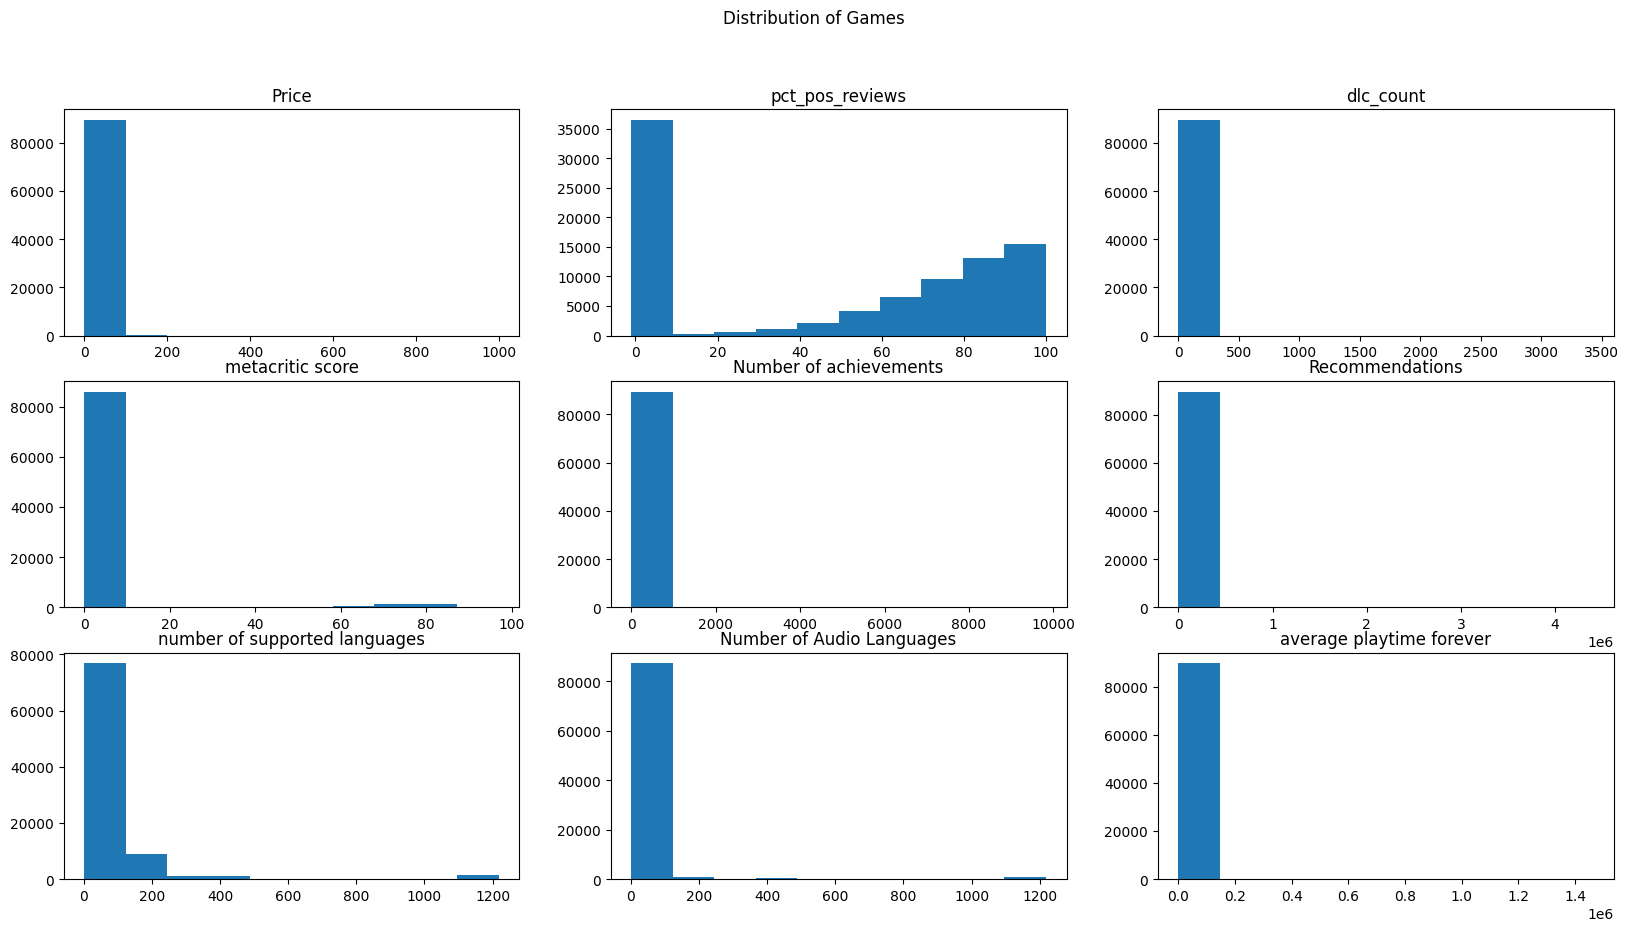

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 10))
ax1.hist(df['price'])
ax1.set_title("Price")
ax2.hist(df['pct_pos_total'])
ax2.set_title("pct_pos_reviews")
ax3.hist(df['dlc_count'])
ax3.set_title("dlc_count")
ax4.hist(df['metacritic_score'])
ax4.set_title("metacritic score")
ax5.hist(df['achievements'])
ax5.set_title("Number of achievements")
ax6.hist(df['recommendations'])
ax6.set_title("Recommendations")

df['num_supported_languages'] = df['supported_languages'].str.len()
df['num_audio_languages'] = df['full_audio_languages'].str.len()

ax7.hist(df['num_supported_languages'])
ax7.set_title("number of supported languages")
ax8.hist(df['num_audio_languages'])
ax8.set_title("Number of Audio Languages")
ax9.hist(df['average_playtime_forever'])
ax9.set_title("average playtime forever")

fig.suptitle('Distribution of Games')

Text(0.5, 0.98, 'Distribution of Games')

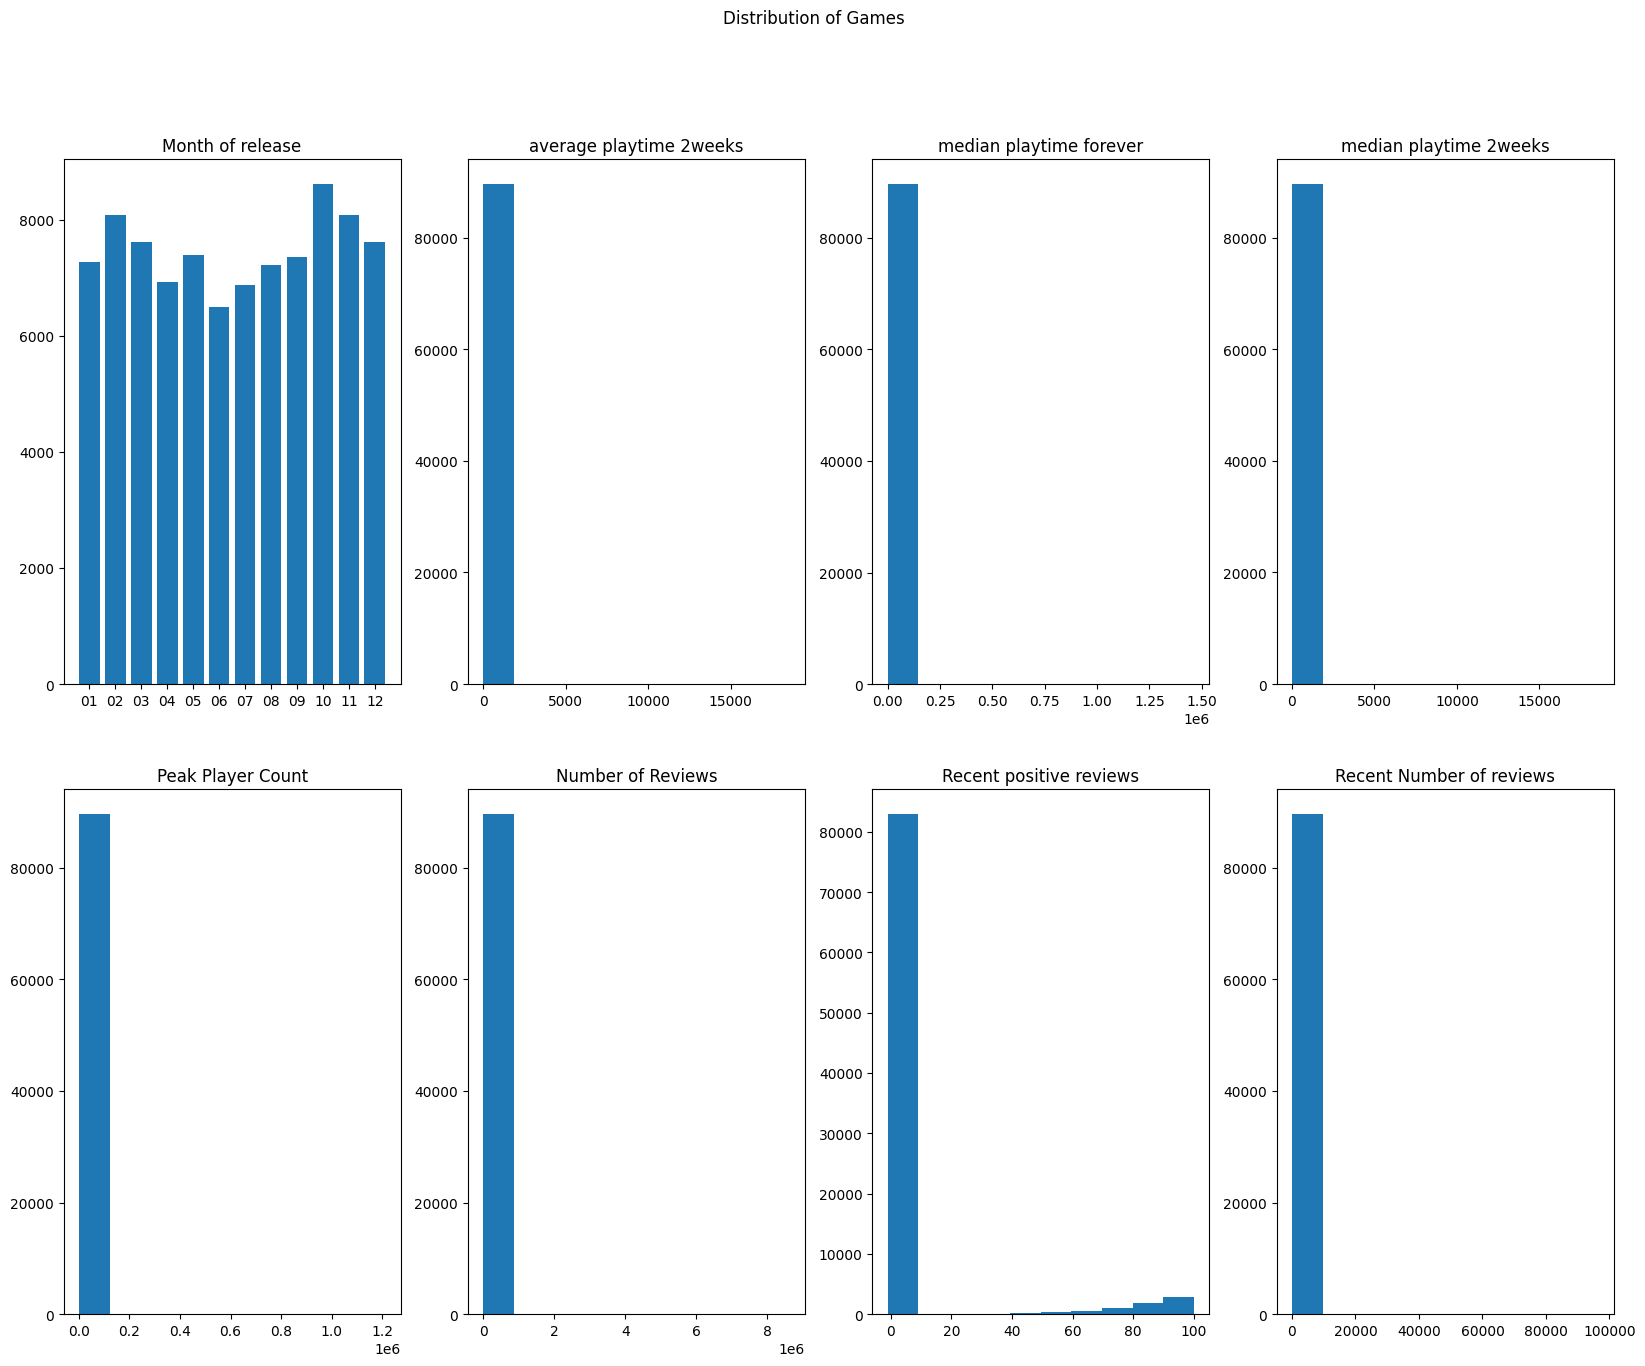

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 15))

num_release_months = df.groupby('release_month')['release_month'].count() # group by release month to clean up bar graph

ax1.bar(num_release_months.index, num_release_months.values)
ax1.set_title("Month of release")
ax2.hist(df['average_playtime_2weeks'])
ax2.set_title("average playtime 2weeks")
ax3.hist(df['median_playtime_forever'])
ax3.set_title("median playtime forever")
ax4.hist(df['median_playtime_2weeks'])
ax4.set_title("median playtime 2weeks")
ax5.hist(df['peak_ccu'])
ax5.set_title("Peak Player Count")
ax6.hist(df['num_reviews_total'])
ax6.set_title("Number of Reviews")
ax7.hist(df['pct_pos_recent'])
ax7.set_title("Recent positive reviews")
ax8.hist(df['num_reviews_recent'])
ax8.set_title("Recent Number of reviews")

fig.suptitle('Distribution of Games')


Text(0.5, 1.0, 'release_year')

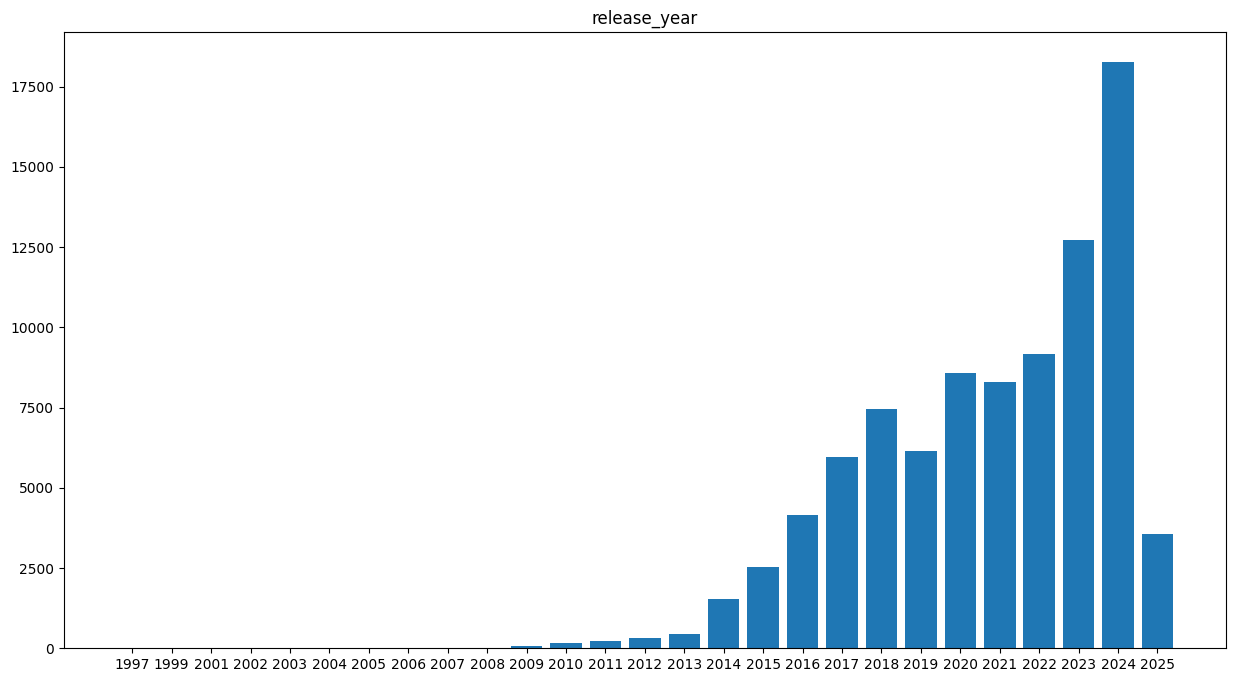

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

# Very large numbers put in their own graphs
num_release_years = df.groupby('release_year')['release_year'].count() # group by release month to clean up bar graph

ax.bar(num_release_years.index, num_release_years.values)
ax.set_title("release_year")

Text(0.5, 1.0, 'Estimated number of owners')

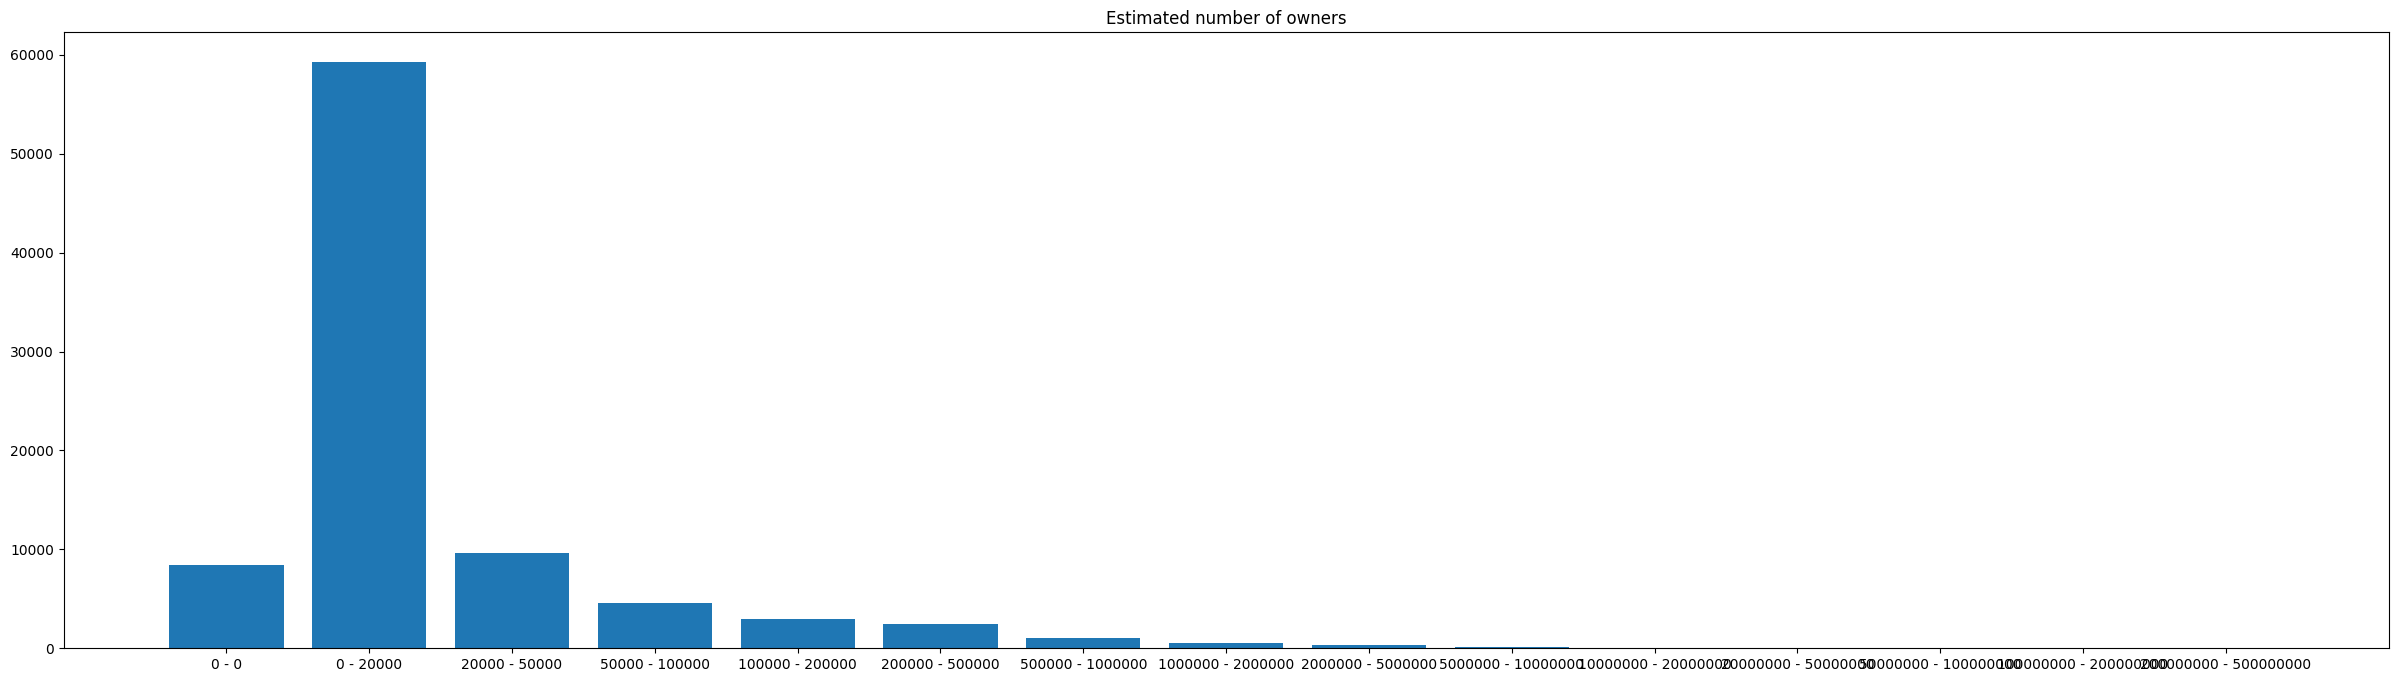

In [ ]:
fig, ax = plt.subplots(figsize=(30, 8))

# Very large numbers put in their own graphs
owner_order = [
    '0 - 0',
    '0 - 20000',
    '20000 - 50000',
    '50000 - 100000',
    '100000 - 200000',
    '200000 - 500000',
    '500000 - 1000000',
    '1000000 - 2000000',
    '2000000 - 5000000',
    '5000000 - 10000000',
    '10000000 - 20000000',
    '20000000 - 50000000',
    '50000000 - 100000000',
    '100000000 - 200000000',
    '200000000 - 500000000'
]
num_owners = df.groupby('estimated_owners')['estimated_owners'].count() # group by release month to clean up bar graph
num_owners_sorted = num_owners.reindex(owner_order)

ax.bar(num_owners_sorted.index, num_owners_sorted.values)
ax.set_title("Estimated number of owners")

## Cleaning Data

The problem with our data is that it is highly skewed and or has a lot of Outliers so clearly we need to do some cleaning and transforming of the data.

In [ ]:
# Cleaning data

## Data greater than 0 that make sense
filtered_df = df.copy()

# Filter outliers
# Want to filter outliers based on the dict in the future
filter_outliers_list = ['price','pct_pos_total', 'dlc_count', 'metacritic_score', 'achievements', 'recommendations', 'num_supported_languages', 'num_audio_languages', 'average_playtime_forever',
                        'average_playtime_2weeks', 'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent'

                        ]
filtered_df = filter_outliers(filtered_df, filter_outliers_list) # Data is winsorized i.e. capped at outlier bounds

### About the filtering

I first applied the winsorizing method capping the values of outliers to the upper bound, this approach is worthwhile as completely removing the rows might remove important data for other columns.

I have found for some columns these values are so extreme that it finds the lower and upper bound to be 0, which is not what we want. In the next set of columns I will try applying log transformation to my entire dataset.

In [ ]:
filtered_df.columns
print(filtered_df['metacritic_score'].mean())

0.0


Text(0.5, 0.98, 'Distrobution of Games')

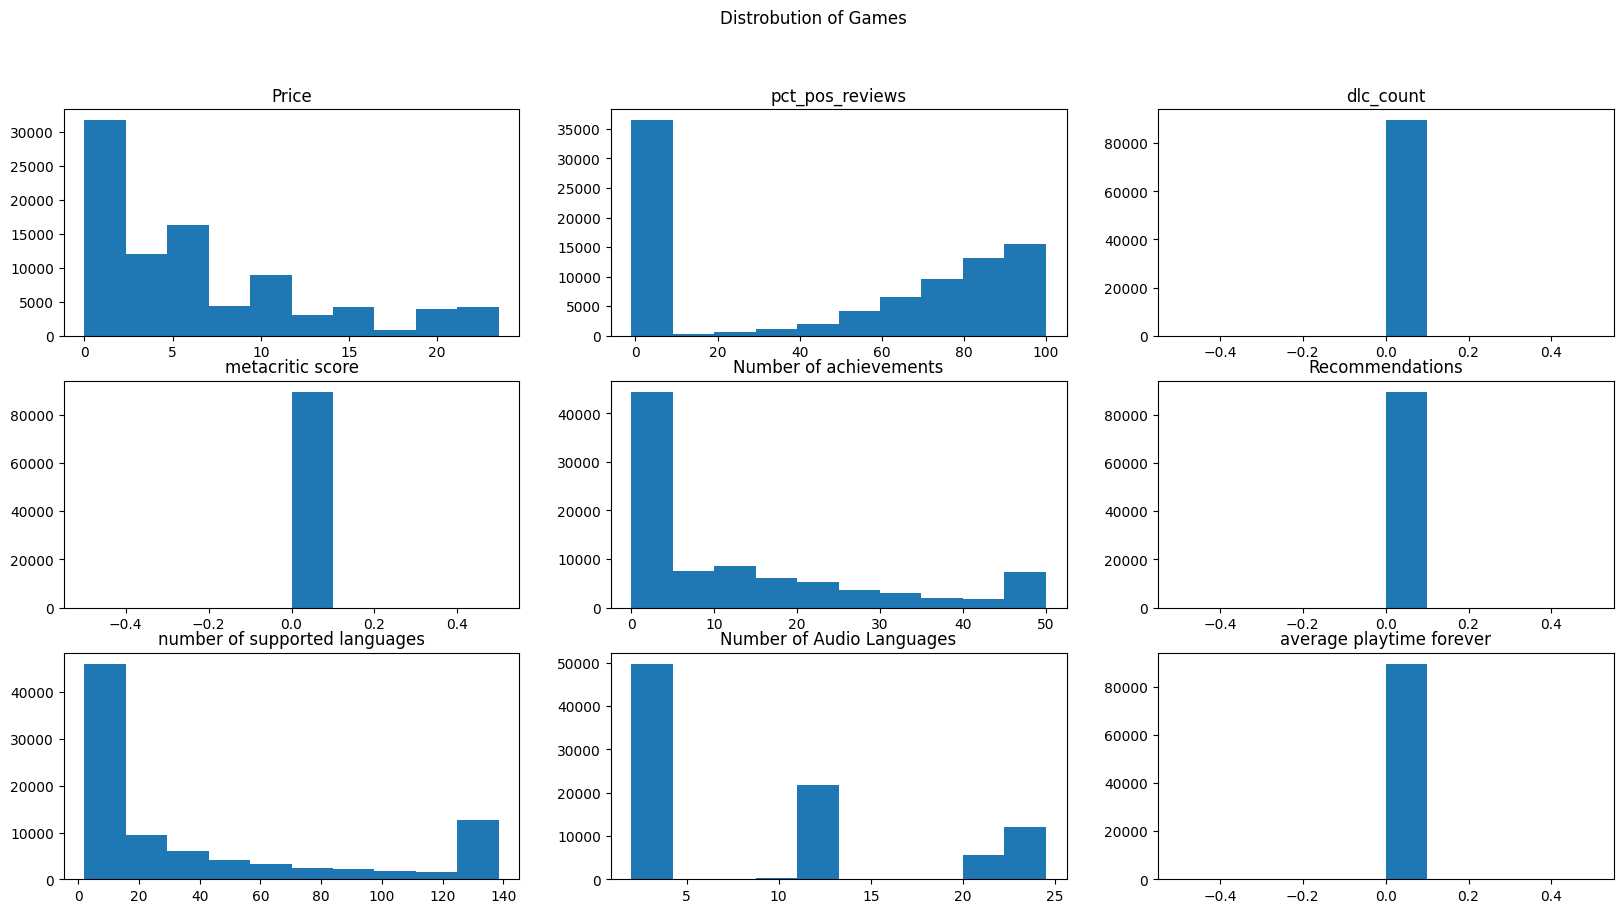

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 10))
ax1.hist(filtered_df['price'])
ax1.set_title("Price")
ax2.hist(filtered_df['pct_pos_total'])
ax2.set_title("pct_pos_reviews")
ax3.hist(filtered_df['dlc_count'])
ax3.set_title("dlc_count")
ax4.hist(filtered_df['metacritic_score'])
ax4.set_title("metacritic score")
ax5.hist(filtered_df['achievements'])
ax5.set_title("Number of achievements")
ax6.hist(filtered_df['recommendations'])
ax6.set_title("Recommendations")
ax7.hist(filtered_df['num_supported_languages'])
ax7.set_title("number of supported languages")
ax8.hist(filtered_df['num_audio_languages'])
ax8.set_title("Number of Audio Languages")
ax9.hist(filtered_df['average_playtime_forever'])
ax9.set_title("average playtime forever")

fig.suptitle('Distrobution of Games')

TypeError: Axes.hist() missing 1 required positional argument: 'x'

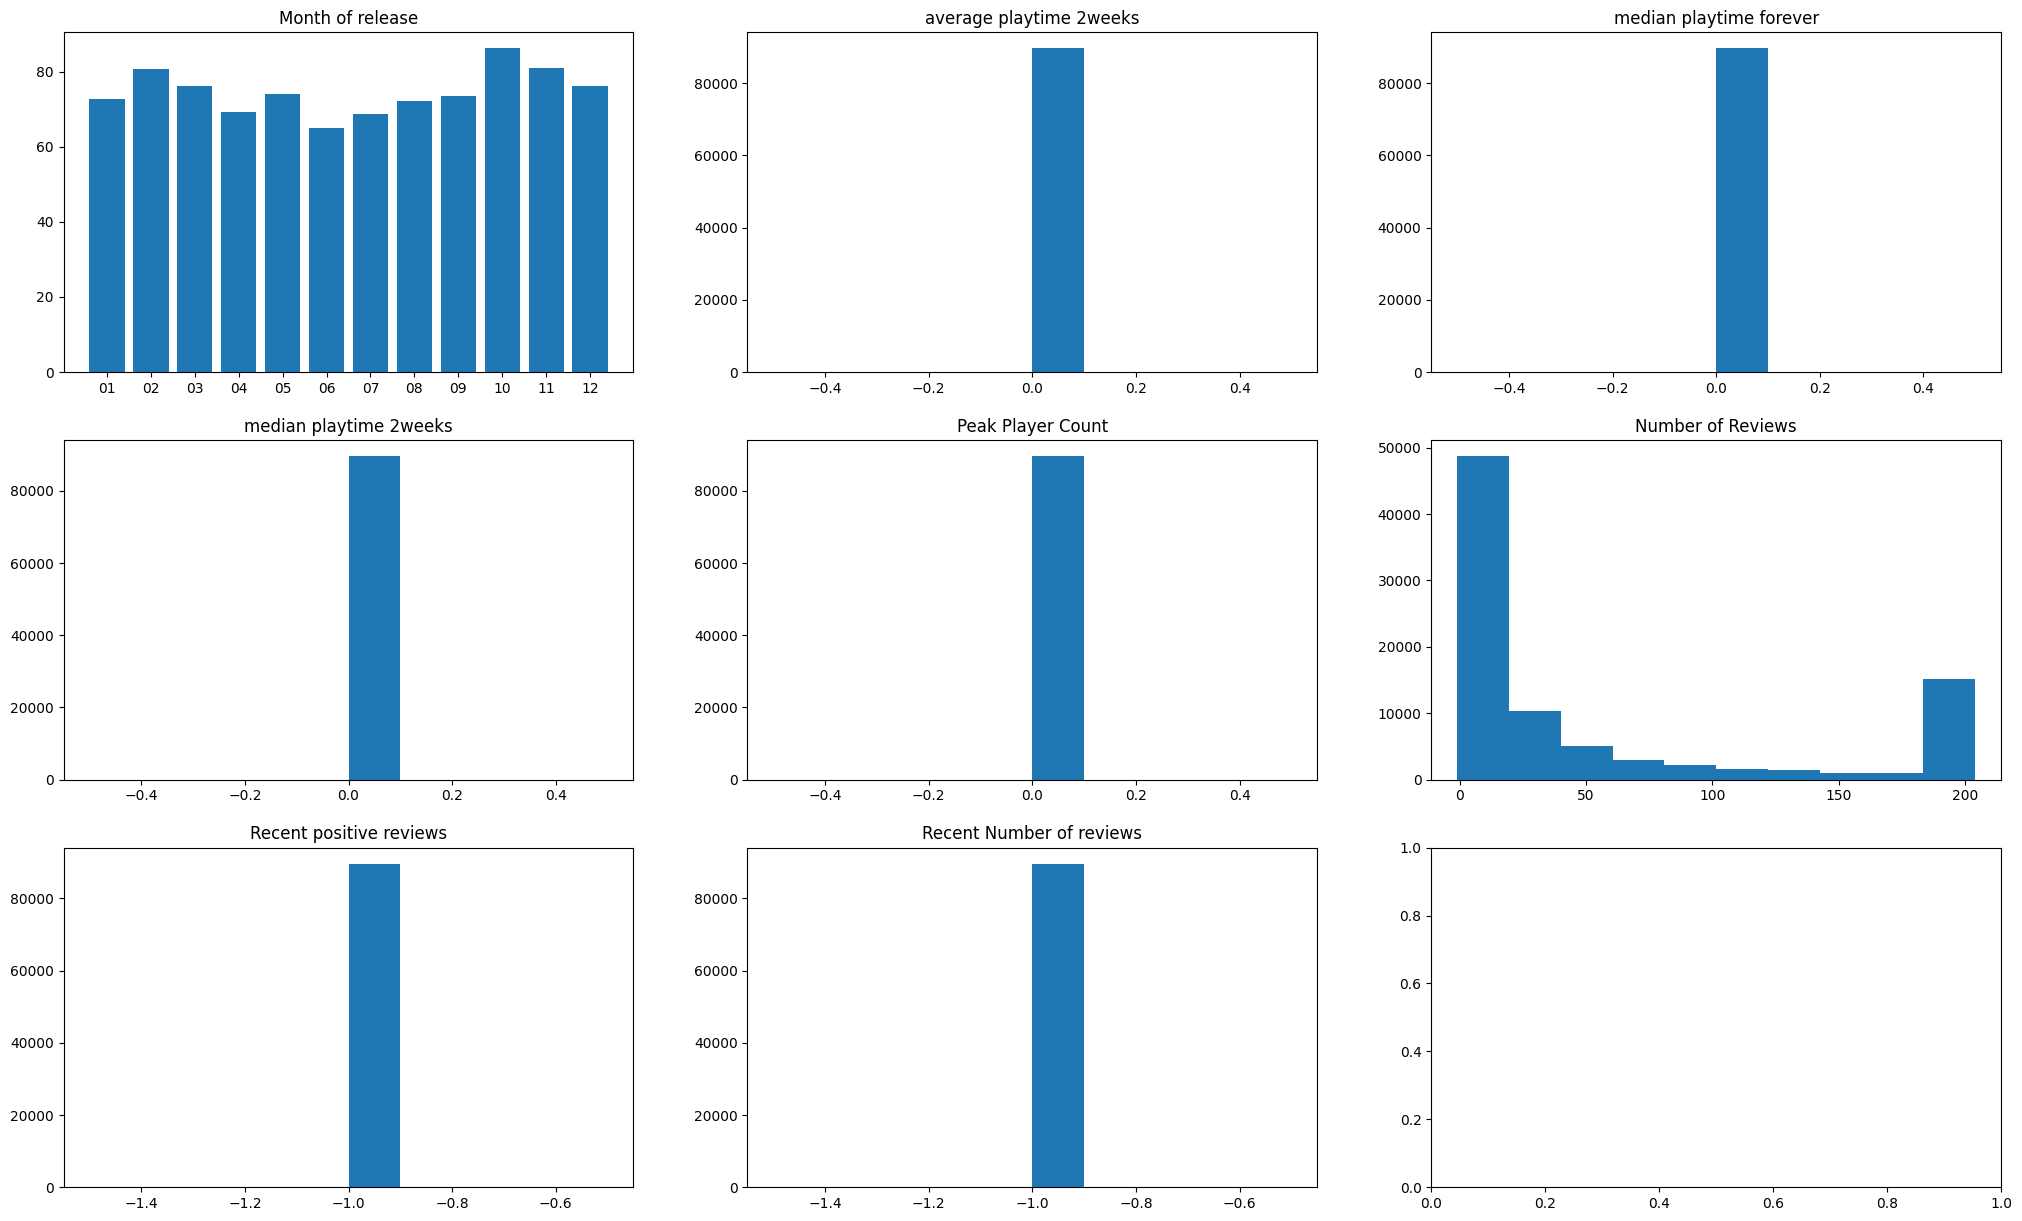

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(25, 15))

num_release_months = filtered_df.groupby('release_month')['release_month'].count() # group by release month to clean up bar graph

ax1.bar(num_release_months.index, num_release_months.values / 100)
ax1.set_title("Month of release")
ax2.hist(filtered_df['average_playtime_2weeks'])
ax2.set_title("average playtime 2weeks")
ax3.hist(filtered_df['median_playtime_forever'])
ax3.set_title("median playtime forever")
ax4.hist(filtered_df['median_playtime_2weeks'])
ax4.set_title("median playtime 2weeks")
ax5.hist(filtered_df['peak_ccu'])
ax5.set_title("Peak Player Count")
ax6.hist(filtered_df['num_reviews_total'])
ax6.set_title("Number of Reviews")
ax7.hist(filtered_df['pct_pos_recent'])
ax7.set_title("Recent positive reviews")
ax8.hist(filtered_df['num_reviews_recent'])
ax8.set_title("Recent Number of reviews")
ax9.hist()
ax9.set_title()

fig.suptitle('Distrobution of Games')

## Cleaning Data using log transformation

During the last set of cleaning it was clear that the data just has too many outliers or is too heavily skewed for us to perform a simple removal/capping of outliers.

In [ ]:
## Data greater than 0 that make sense
filtered_df = df.copy()

# Filter outliers
# Want to filter outliers based on the dict in the future
filter_outliers_list = ['price','pct_pos_total', 'dlc_count', 'metacritic_score', 'achievements', 'recommendations', 'num_supported_languages', 'num_audio_languages', 'average_playtime_forever',
                        'average_playtime_2weeks', 'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent'

                        ]

filtered_df = log_trans(filtered_df, filter_outliers_list)

Optimal Lambda found: -0.0111
Optimal Lambda found: 0.2995
Optimal Lambda found: -5.8216
Optimal Lambda found: -5.8785
Optimal Lambda found: -0.1613
Optimal Lambda found: -0.7963
Optimal Lambda found: -0.5878
Optimal Lambda found: -0.6057
Optimal Lambda found: -2.1378
Optimal Lambda found: -26.3702
Optimal Lambda found: -2.1805
Optimal Lambda found: -26.2492
Optimal Lambda found: -1.8225
Optimal Lambda found: -0.0227
Optimal Lambda found: -1.6823
Optimal Lambda found: -1.8751


Text(0.5, 0.98, 'Distrobution of Games')

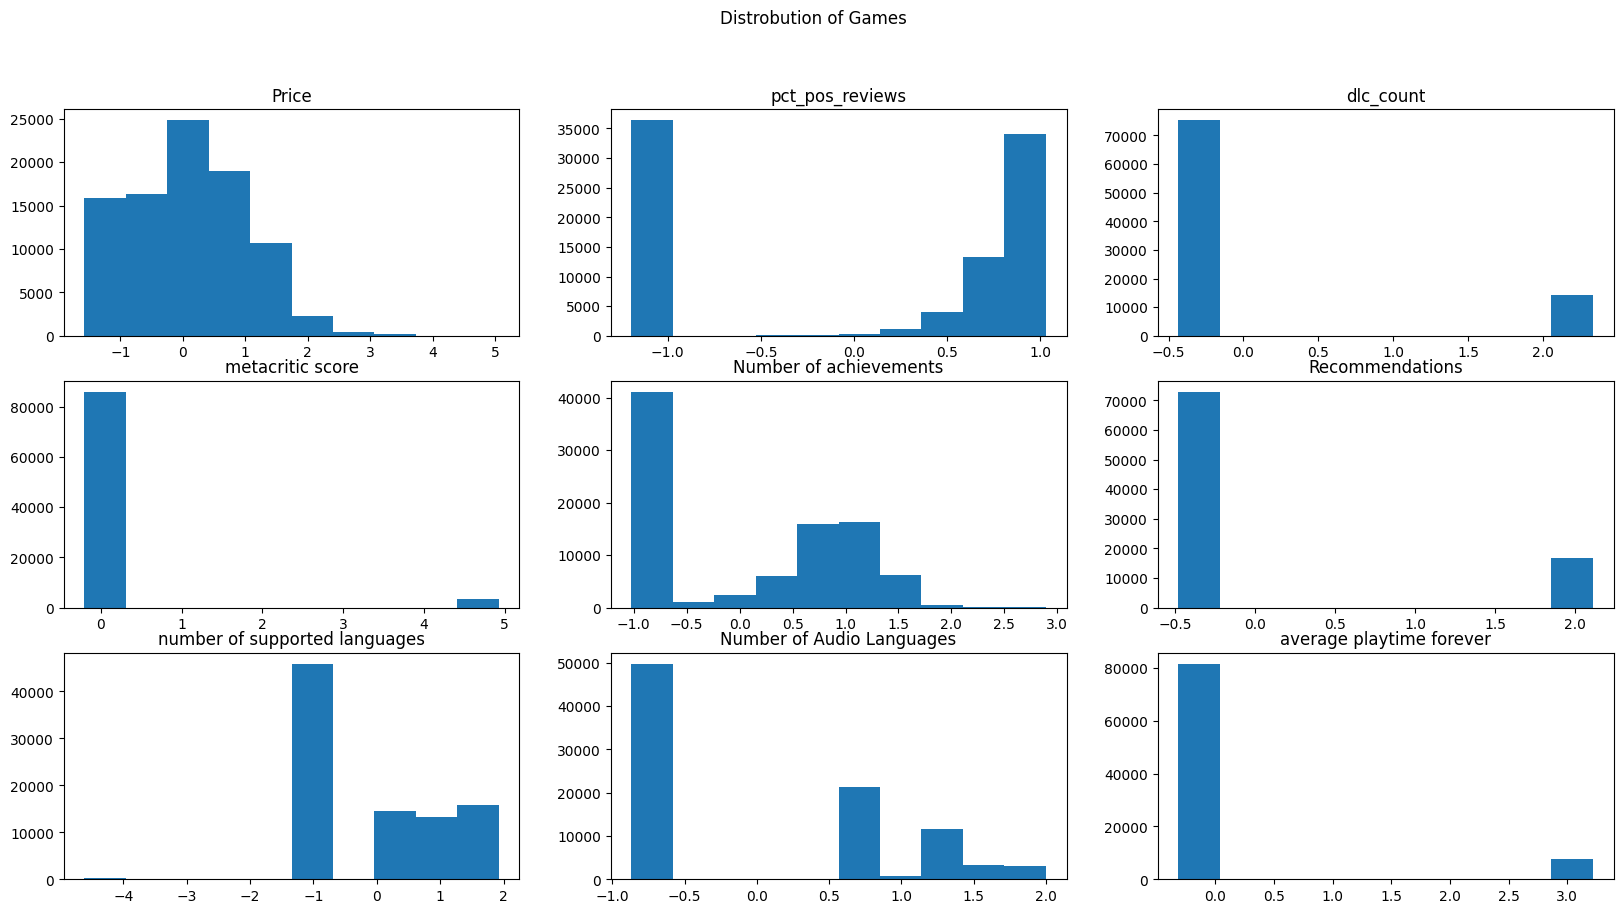

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 10))
ax1.hist(filtered_df['price_transformed'])
ax1.set_title("Price")
ax2.hist(filtered_df['pct_pos_total_transformed'])
ax2.set_title("pct_pos_reviews")
ax3.hist(filtered_df['dlc_count_transformed'])
ax3.set_title("dlc_count")
ax4.hist(filtered_df['metacritic_score_transformed'])
ax4.set_title("metacritic score")
ax5.hist(filtered_df['achievements_transformed'])
ax5.set_title("Number of achievements")
ax6.hist(filtered_df['recommendations_transformed'])
ax6.set_title("Recommendations")
ax7.hist(filtered_df['num_supported_languages_transformed'])
ax7.set_title("number of supported languages")
ax8.hist(filtered_df['num_audio_languages_transformed'])
ax8.set_title("Number of Audio Languages")
ax9.hist(filtered_df['average_playtime_forever_transformed'])
ax9.set_title("average playtime forever")

fig.suptitle('Distrobution of Games')

### About log Tranformation

While I have extremely skewed data, applying the log transformation has a limitation when the data is not of a power law, one example of this is dlc count, you can see from the histogram that the data doesn't end up as a bell curve. It is clear that cleaning the data will require more of a hybrid approach.

## Hybrid cleaning Approach

Optimal Lambda found: 0.1083
Optimal Lambda found: 0.2995
Optimal Lambda found: -0.1134
Optimal Lambda found: -0.5570
Optimal Lambda found: -0.5541
Optimal Lambda found: 0.1236
Optimal Lambda found: -5.8216
Optimal Lambda found: -5.8785
Optimal Lambda found: -0.7963
Optimal Lambda found: -2.1378
Optimal Lambda found: -26.3702
Optimal Lambda found: -2.1805
Optimal Lambda found: -26.2492
Optimal Lambda found: -1.8225
Optimal Lambda found: -1.6823
Optimal Lambda found: -1.8751


Text(0.5, 0.98, 'Distrobution of Games')

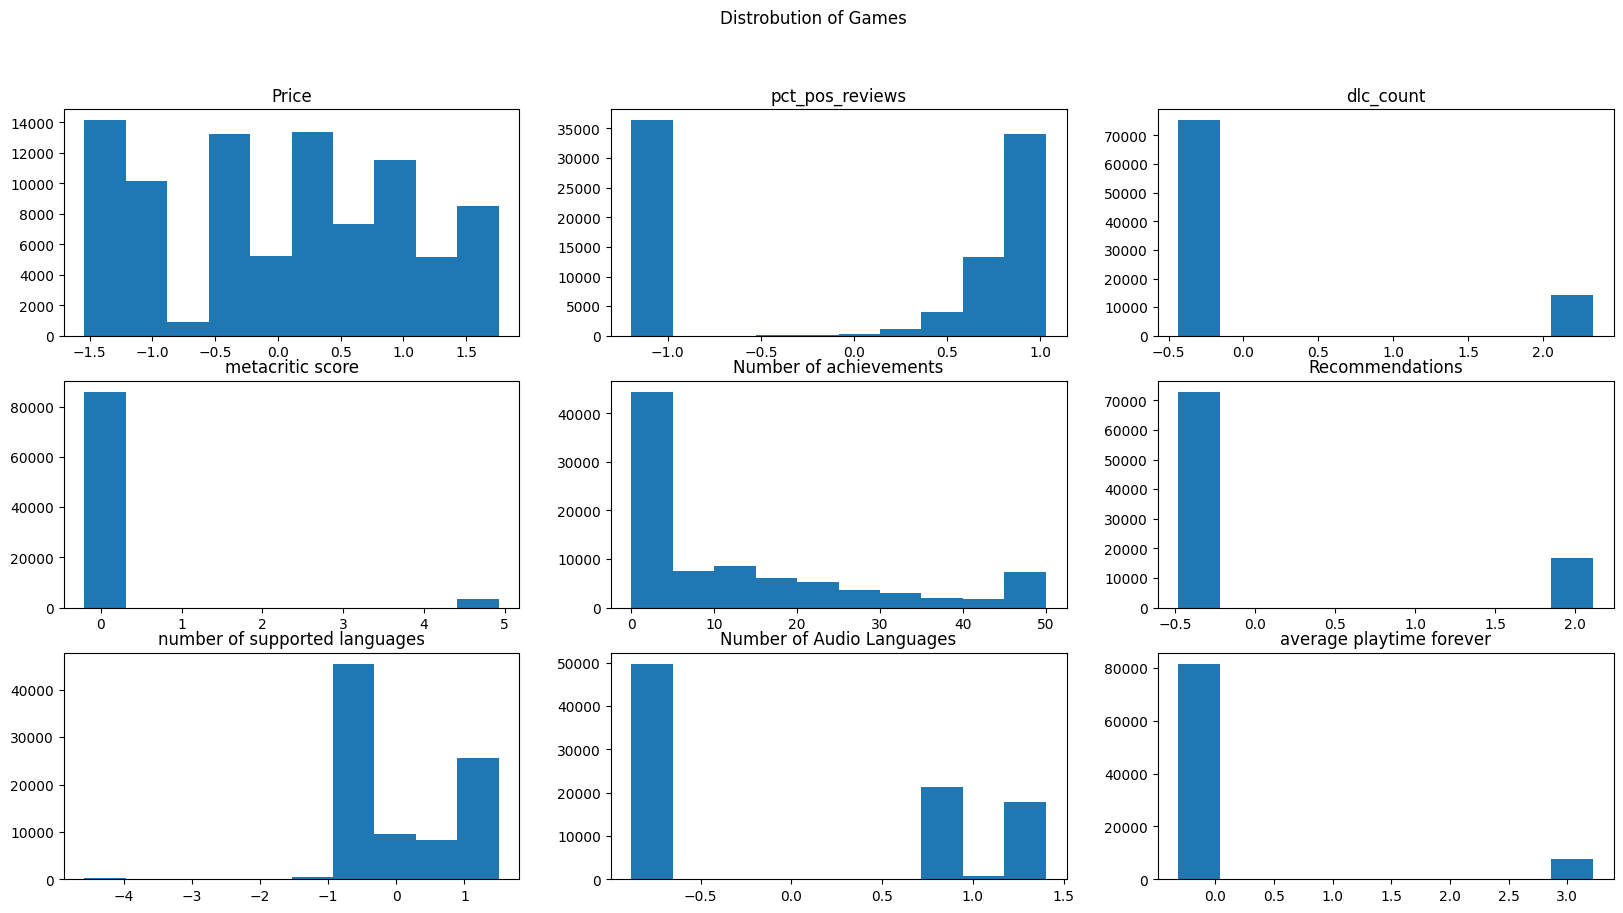

In [ ]:
filtered_df = df.copy()

#First we winsorize the data
filter_outliers_list = ['price','pct_pos_total', 'achievements', 'num_supported_languages', 'num_audio_languages',
                         'num_reviews_total',
                        ]

# list of data that doesn't seem to winsorize well
bad_outliers_list = ['dlc_count', 'metacritic_score', 'recommendations', 'average_playtime_forever', 'average_playtime_2weeks',
                     'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'pct_pos_recent', 'num_reviews_recent'
                     ]

filtered_df = filter_outliers(filtered_df, filter_outliers_list)
filtered_df = log_trans(filtered_df, filter_outliers_list)
filtered_df = log_trans(filtered_df, bad_outliers_list)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 10))
ax1.hist(filtered_df['price_transformed'])
ax1.set_title("Price")
ax2.hist(filtered_df['pct_pos_total_transformed'])
ax2.set_title("pct_pos_reviews")
ax3.hist(filtered_df['dlc_count_transformed'])
ax3.set_title("dlc_count")
ax4.hist(filtered_df['metacritic_score_transformed'])
ax4.set_title("metacritic score")
ax5.hist(filtered_df['achievements'])
ax5.set_title("Number of achievements")
ax6.hist(filtered_df['recommendations_transformed'])
ax6.set_title("Recommendations")
ax7.hist(filtered_df['num_supported_languages_transformed'])
ax7.set_title("number of supported languages")
ax8.hist(filtered_df['num_audio_languages_transformed'])
ax8.set_title("Number of Audio Languages")
ax9.hist(filtered_df['average_playtime_forever_transformed'])
ax9.set_title("average playtime forever")

fig.suptitle('Distrobution of Games')

Text(0.5, 0.98, 'Distrobution of Games')

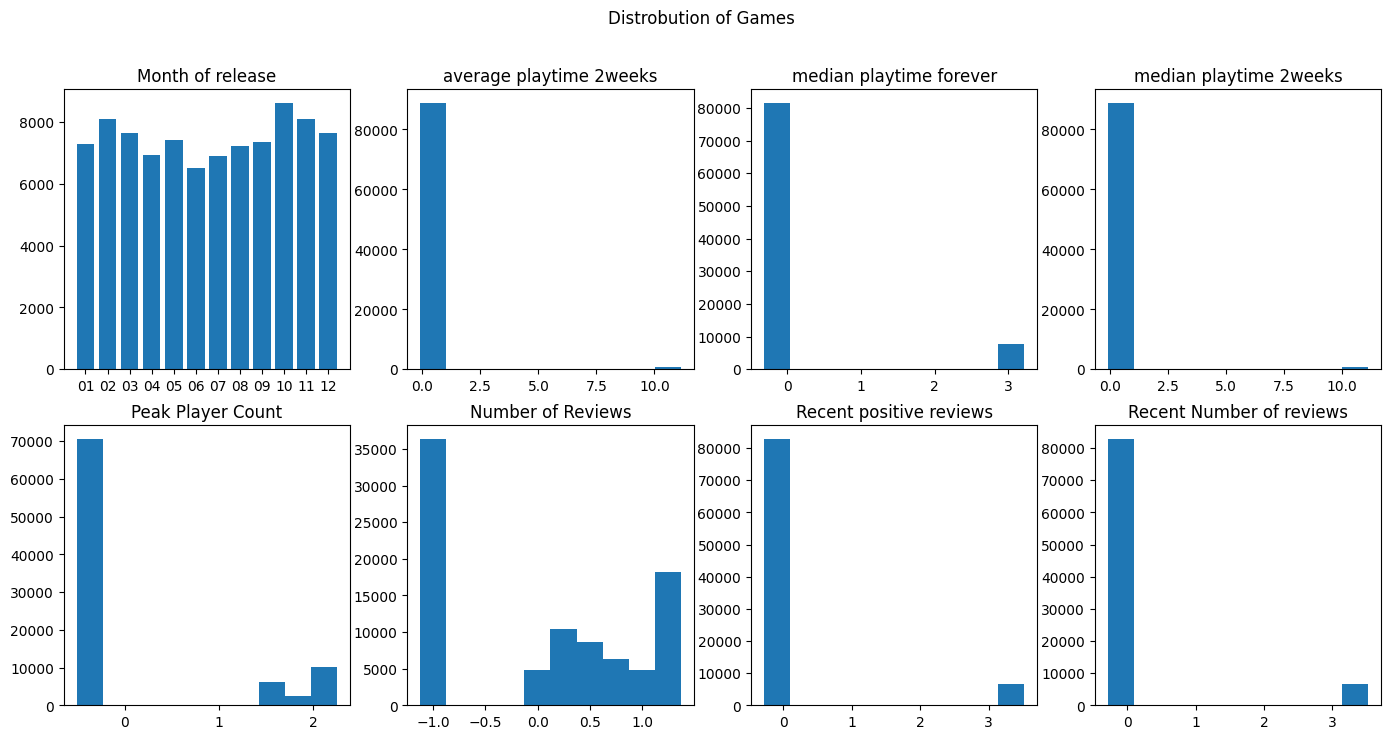

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(17, 8))

num_release_months = filtered_df.groupby('release_month')['release_month'].count() # group by release month to clean up bar graph

ax1.bar(num_release_months.index, num_release_months.values)
ax1.set_title("Month of release")
ax2.hist(filtered_df['average_playtime_2weeks_transformed'])
ax2.set_title("average playtime 2weeks")
ax3.hist(filtered_df['median_playtime_forever_transformed'])
ax3.set_title("median playtime forever")
ax4.hist(filtered_df['median_playtime_2weeks_transformed'])
ax4.set_title("median playtime 2weeks")
ax5.hist(filtered_df['peak_ccu_transformed'])
ax5.set_title("Peak Player Count")
ax6.hist(filtered_df['num_reviews_total_transformed'])
ax6.set_title("Number of Reviews")
ax7.hist(filtered_df['pct_pos_recent_transformed'])
ax7.set_title("Recent positive reviews")
ax8.hist(filtered_df['num_reviews_recent_transformed'])
ax8.set_title("Recent Number of reviews")

fig.suptitle('Distrobution of Games')

# Analyzing Price and Release Month

## Hypothesis

$H_0$: The mean (or average) transformed price of games is the same across all 12 release months.

$H_A$: At least one release month has a mean transformed price that is different from the others.

## Finding correlary data

Now that we have cleaned the data an found possible normal data. There are clearly a number of datasets I cannot use at this moment. Let's plot this data all together to see if any have any kind of correlation.

In [ ]:
# Create copy of the dataframe
filtered_df = df.copy()

# Apply the log transformation and cap the outliers
filtered_df = log_trans(filtered_df, ['price'])
filtered_df = filter_outliers(filtered_df, ['price_transformed'])

# Apply log transformation and cap outliers of the paid games
filtered_df = log_trans(filtered_df, ['paid_games_price'])
filtered_df = filter_outliers(filtered_df, ['paid_games_price_transformed'])

Optimal Lambda found: -0.0111
Optimal Lambda found: -0.1448


In [ ]:
#Fit the ANOVA model
model = ols('price_transformed ~ C(release_month)', data=filtered_df).fit()

#Perform the ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA Table (Testing for Price Differences Across Months):")
print(anova_table)


ANOVA Table (Testing for Price Differences Across Months):
                        sum_sq       df         F        PR(>F)
C(release_month)    100.286377     11.0  9.160366  1.290371e-16
Residual          89181.238901  89606.0       NaN           NaN


The Anova Table shows that the PR(>F) column or the P-value as a very small number. The normal significance level is 0.05 which means the values correlate very well and we should reject the null hypothesis.

In [ ]:
lin_reg_cat(filtered_df, 'release_month_name', 'price_transformed', 'mean', contains_list=False, print_r2=True)

R2 Value: 0.0011215150913588268
Root Mean Squared Error: 1.0013022406779024


/tmp/ipython-input-1979541179.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  actual_values = (df_dummy.groupby(category_column)[target_column].agg(agg_func).reset_index().rename(columns={target_column: f'actual {target_column}'}))


,release_month_name,predicted price_transformed,actual price_transformed
0,August,-0.021790,-0.020193
1,December,-0.025528,-0.028842
2,July,-0.019884,-0.020343
3,April,-0.013258,-0.009566
4,October,0.045906,0.051107
5,May,-0.029084,-0.026303
6,February,-0.010738,-0.006372
7,November,0.035402,0.042252
8,September,0.057855,0.058543
9,March,0.011597,0.007129


This looks good but the log of price is hard to read, let's transform it back into a normal price.

In [ ]:
data = {
    'release_month_name': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'predicted price_transformed': [-0.040256, -0.011883, 0.010034, -0.014205, -0.020413,-0.028411,-0.021913,-0.018586, 0.058683, 0.051510, 0.042488, -0.034036 ],
    'actual price_transformed': [-0.046252,  -0.006372, 0.007129, -0.009566,-0.026303,  -0.024653,-0.020343,-0.020193, 0.058543, 0.051107, 0.042252,-0.028842]
}
pred_df = pd.DataFrame(data)

# Get the data column that was originally fed into log_trans (e.g., the capped price column)
original_price_column = filtered_df['price'].values.reshape(-1, 1)

# Instantiate and fit a PowerTransformer (using the same settings: yeo-johnson, standardize=True)
price_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
price_transformer.fit(original_price_column)

# The lambda is now stored internally:
print(f"Lambda value confirmed: {price_transformer.lambdas_[0]:.4f}")

#Apply the inverse transform to the predicted values
pred_df['predicted_price_USD'] = price_transformer.inverse_transform(
    pred_df['predicted price_transformed'].values.reshape(-1, 1)
).flatten()

#Apply the inverse transform to the actual values for comparison
pred_df['actual_price_USD'] = price_transformer.inverse_transform(
    pred_df['actual price_transformed'].values.reshape(-1, 1)
).flatten()


# Display the final dollar prices
print("\nPredicted and Actual Prices (in USD):")
print(pred_df[['release_month_name', 'predicted_price_USD', 'actual_price_USD']].round(2))

Lambda value confirmed: -0.0111

Predicted and Actual Prices (in USD):
   release_month_name  predicted_price_USD  actual_price_USD
0             January                 3.72              3.70
1            February                 3.86              3.89
2               March                 3.97              3.96
3               April                 3.85              3.88
4                 May                 3.82              3.79
5                June                 3.78              3.80
6                July                 3.81              3.82
7              August                 3.83              3.82
8           September                 4.23              4.23
9             October                 4.19              4.19
10           November                 4.14              4.14
11           December                 3.75              3.78


## Analysis of Predicted Data

From the predicted data it seems like the predictions are quite accurate. And it shows the orginal pattern of games around holidays being more expensive. However the values are still quite low. This is most likely because the dataset that we have is dominated by free steam games.

Now what would happen if we made the assumption that we want to know a predicted price of a game released in a specific month based on it being a paid game, after all we want to know how much we expect to pay, if we pay nothing it doesn't tell us much.

In [ ]:
#Fit the ANOVA model
model = ols('paid_games_price_transformed ~ C(release_month)', data=filtered_df).fit()

#Perform the ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA Table (Testing for Price Differences Across Months):")
print(anova_table)


ANOVA Table (Testing for Price Differences Across Months):
                        sum_sq       df        F        PR(>F)
C(release_month)     98.794970     11.0  9.10899  1.676634e-16
Residual          74388.900759  75446.0      NaN           NaN


Looks like this anova table is good as well. So let's move on to predicting prices.

In [ ]:
lin_reg_cat(filtered_df, 'release_month_name', 'paid_games_price_transformed', 'mean', contains_list=False, print_r2=True)

R2 Value: 0.0010824554290765898
Root Mean Squared Error: 0.9944952327348858


/tmp/ipython-input-1979541179.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  actual_values = (df_dummy.groupby(category_column)[target_column].agg(agg_func).reset_index().rename(columns={target_column: f'actual {target_column}'}))


,release_month_name,predicted paid_games_price_transformed,actual paid_games_price_transformed
0,December,-0.030225,-0.028570
1,May,0.005938,0.004325
2,February,-0.031995,-0.027838
3,November,0.047184,0.038023
4,August,0.008184,0.003759
5,October,0.040839,0.046133
6,September,0.063802,0.057638
7,June,0.001729,-0.001955
8,April,-0.032933,-0.026843
9,January,-0.063130,-0.072824


In [ ]:
data = {
    'release_month_name': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'predicted paid_games_price_transformed': [-0.079921, -0.027422, -0.026878, -0.038584, -0.005887,-0.006976,0.006877,0.009185, 0.049711, 0.058476, 0.033942, -0.018102],
    'actual paid_games_price_transformed': [-0.072824,  -0.027838, -0.028448, -0.026843, 0.004325,  -0.001955, -0.000263, 0.003759, 0.057638, 0.046133, 0.038023,-0.028570]
}
pred_df = pd.DataFrame(data)

# Get the data column that was originally fed into log_trans (e.g., the capped price column)
original_price_column = filtered_df['paid_games_price'].values.reshape(-1, 1)

# Instantiate and fit a PowerTransformer (using the same settings: yeo-johnson, standardize=True)
price_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
price_transformer.fit(original_price_column)

# The lambda is now stored internally:
print(f"Lambda value confirmed: {price_transformer.lambdas_[0]:.4f}")

#Apply the inverse transform to the predicted values
pred_df['predicted_paid_games_price_USD'] = price_transformer.inverse_transform(
    pred_df['predicted paid_games_price_transformed'].values.reshape(-1, 1)
).flatten()

#Apply the inverse transform to the actual values for comparison
pred_df['actual_paid_games_price_USD'] = price_transformer.inverse_transform(
    pred_df['actual paid_games_price_transformed'].values.reshape(-1, 1)
).flatten()


# Display the final dollar prices
print("\nPredicted and Actual Prices (in USD):")
print(pred_df[['release_month_name', 'predicted_paid_games_price_USD', 'actual_paid_games_price_USD']].round(2))

Lambda value confirmed: -0.1448

Predicted and Actual Prices (in USD):
   release_month_name  predicted_paid_games_price_USD  \
0             January                            4.98   
1            February                            5.24   
2               March                            5.24   
3               April                            5.18   
4                 May                            5.34   
5                June                            5.34   
6                July                            5.41   
7              August                            5.42   
8           September                            5.63   
9             October                            5.68   
10           November                            5.55   
11           December                            5.28   

    actual_paid_games_price_USD  
0                          5.01  
1                          5.23  
2                          5.23  
3                          5.24  
4                

# Analyzing Price and Reviews

Hypothesis

$H_0$: The price of the game will not matter, and the games will get reviewed the same.

$H_A$: The reviews will be affected based on how much the user paid for the game.

### Set Up
We can look at the data provided by the CSV to estimate what the price will be for each game, and then we can compare it to the percent of positive reviews, and the total reviews given. This can give us a better idea not only about how the price affects the reviews, but how willing people were to give a review about a certain game.

In [ ]:
#Create a new DataFrame for Reviews and Price
r_df = df[['price', 'pct_pos_total', 'num_reviews_total']]
r_df = r_df[r_df['price'] != 0]



### Price versus Total Amount of Reviews given


This chart compares the total amount of reviews given to a game, versus the price of the game. The reason we create this chart to look at is because it not only shows us the relationship between the two, but also the willingness of the user to leave a review on a game they paid a lot for.

Text(0.5, 1.0, 'Price versus number of reviews')

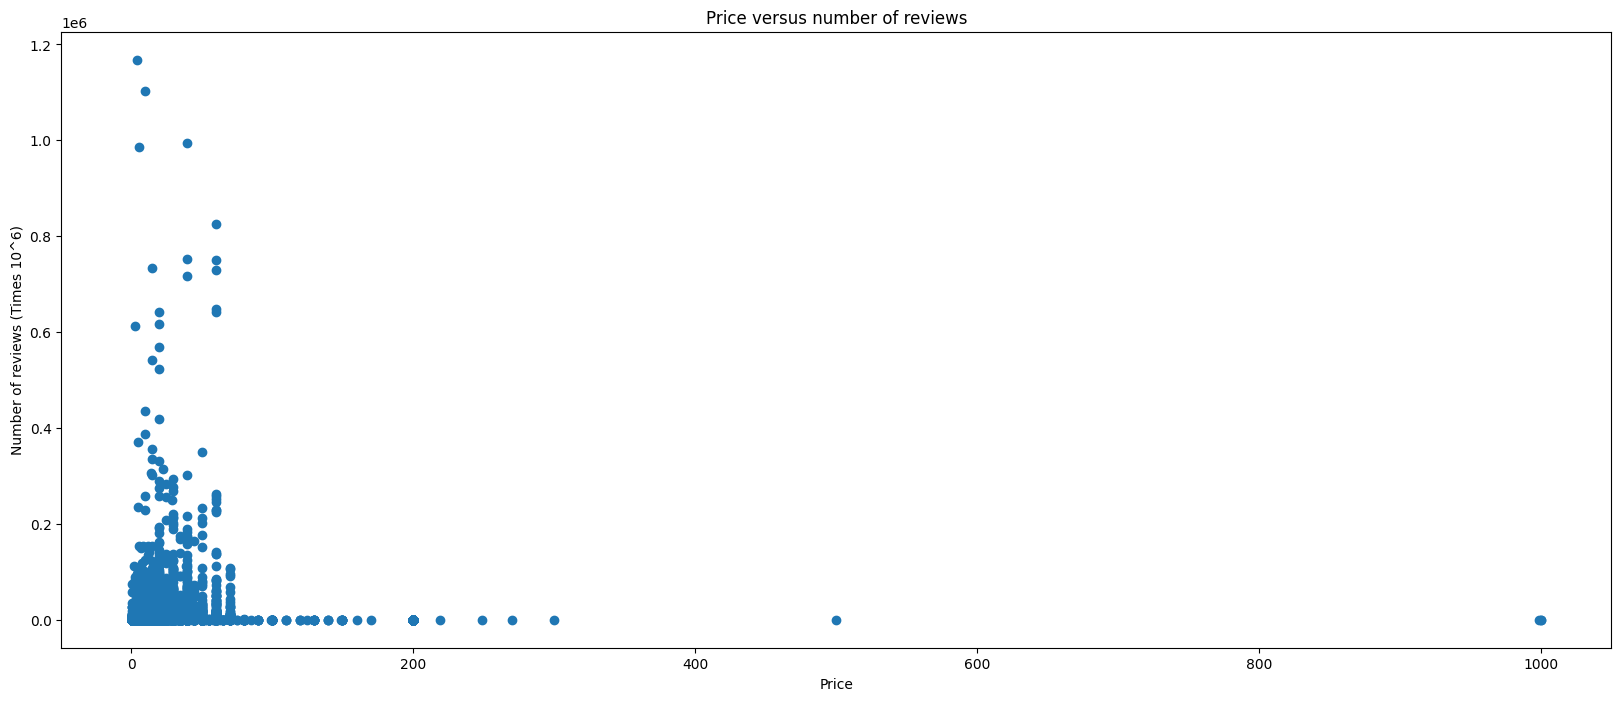

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(r_df['price'], r_df['num_reviews_total'])
ax.set_xlabel("Price")
ax.set_ylabel("Number of reviews (Times 10^6)")
ax.set_title("Price versus number of reviews")



We can see a clear skew to the right, where most of the data is bunched up to the left. This is because the x-axis, shows us there aren't many games with a price of over 200 dollars. This makes sense because not many people would pay 200 dollars for something intangible.

### Price versus Amount of Positive Reviews given

Text(0.5, 1.0, 'Price versus positive Reviews')

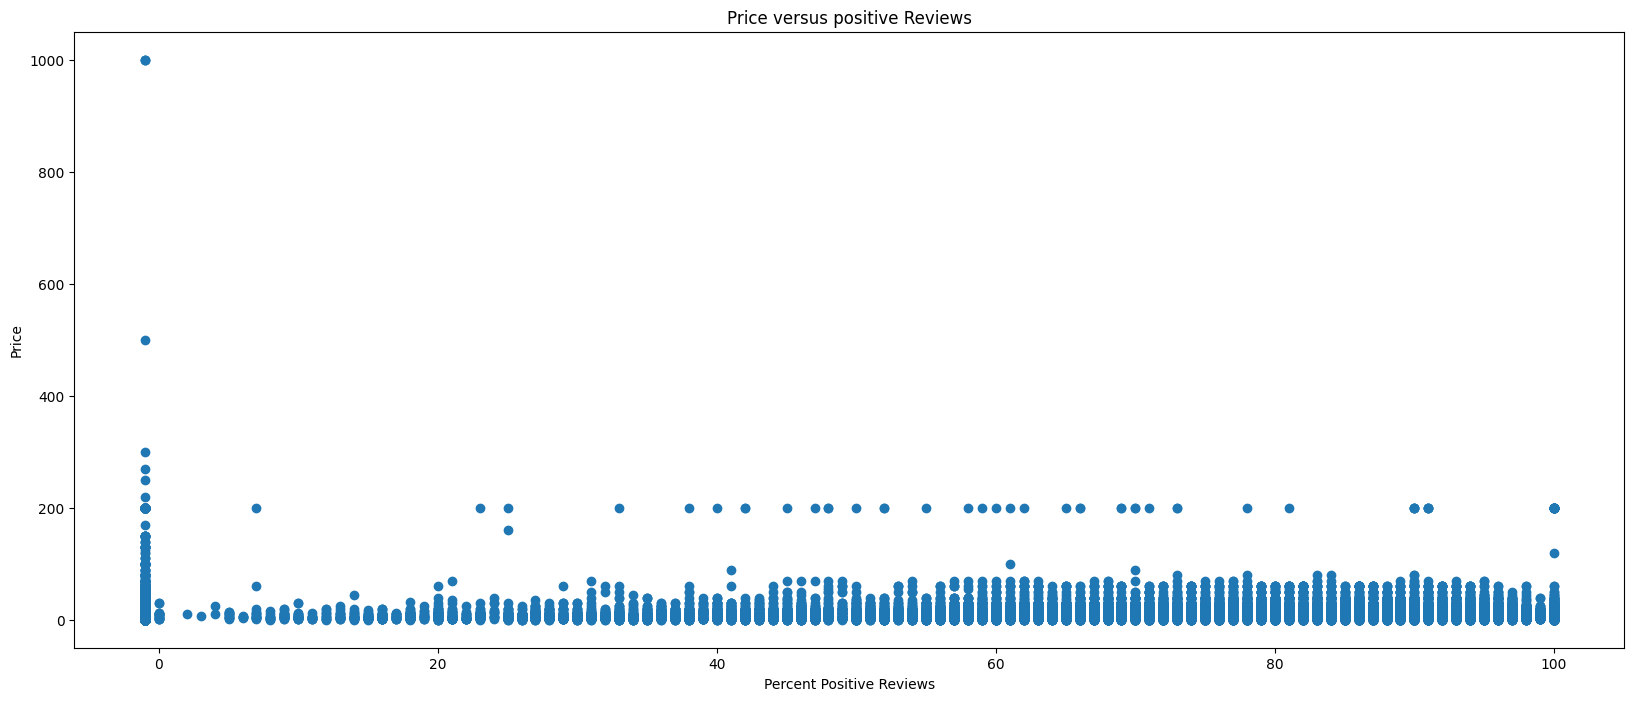

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(r_df['pct_pos_total'], r_df['price'])
ax.set_xlabel("Percent Positive Reviews")
ax.set_ylabel("Price")
ax.set_title("Price versus positive Reviews")


In this graph, we can see a clear skew towards the top of the graph. This happens because while on the last graph, the price was heavily skewed towards the right, this time the price is skewed towards the top because of where the price variable is.

### Cleaned Data Sets

Let's start with cleaning some of the data, and getting rid of outliers within it.

In [ ]:
r_df = r_df[(r_df['price'] >= 0) & (r_df['price'] <= 600)]
r_df = r_df[(r_df['pct_pos_total'] >= 1)]


### Cleaned Total Reviews Given vs. Price

Text(0.5, 1.0, 'Cleaned Price versus number of reviews')

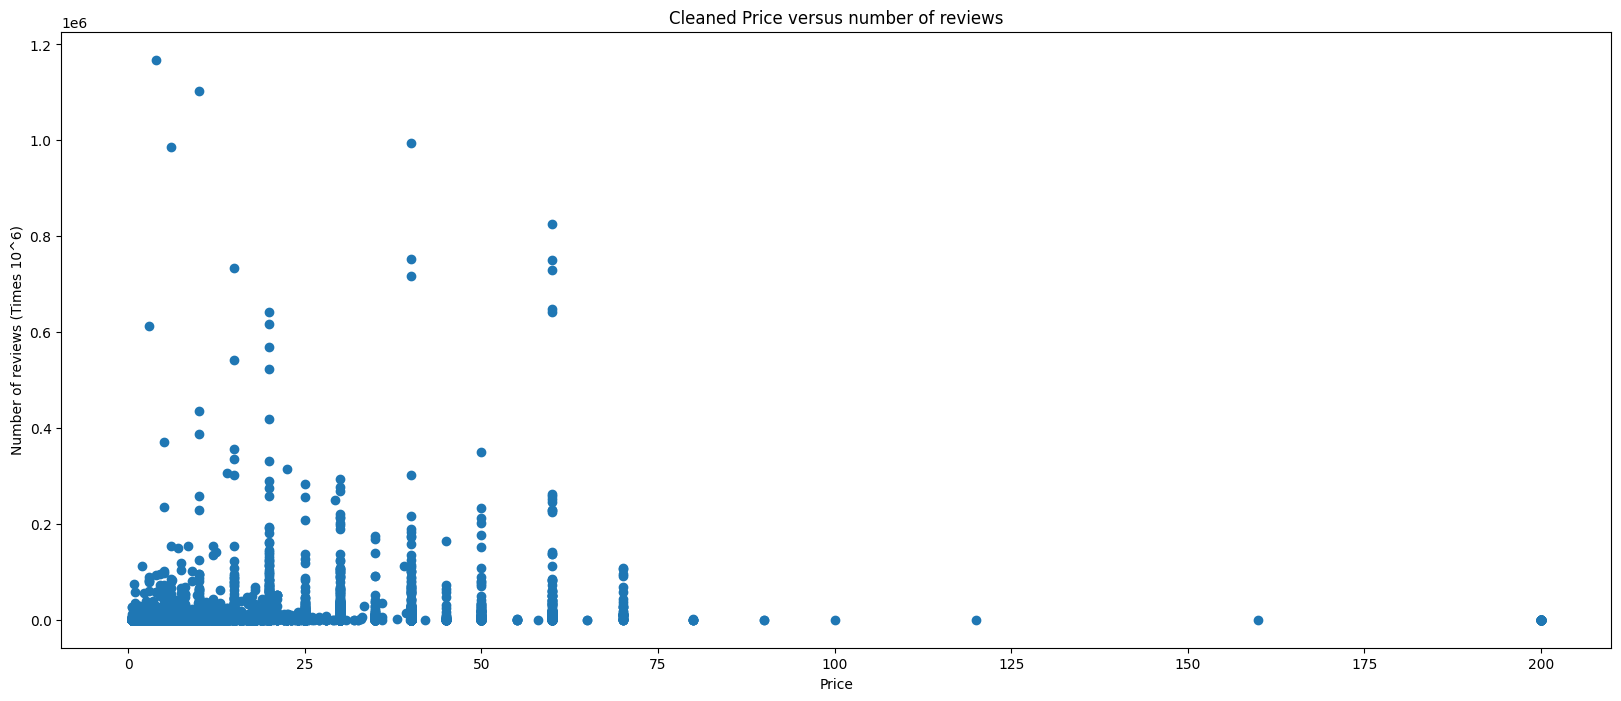

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(r_df['price'], r_df['num_reviews_total'])
ax.set_xlabel("Price")
ax.set_ylabel("Number of reviews (Times 10^6)")
ax.set_title("Cleaned Price versus number of reviews")


We can see with this graph, that it is much more spread out and doesn't look skewed in any direction. This shows us that normalizing our data is important, because it can give us a greater picture. There are a couple of things that we can predict from this table. One: That free games are a large part of this data set, and we can see that the most reviewed game on here is in fact a free one. Two: A lot of titles use similar price points, numbers that are easy on the eyes, such as $49.99$, $99.99$, $149.99$, etc.

### Cleaned Percent Positive Reviews vs. Price

Text(0.5, 1.0, 'Price versus positive Reviews')

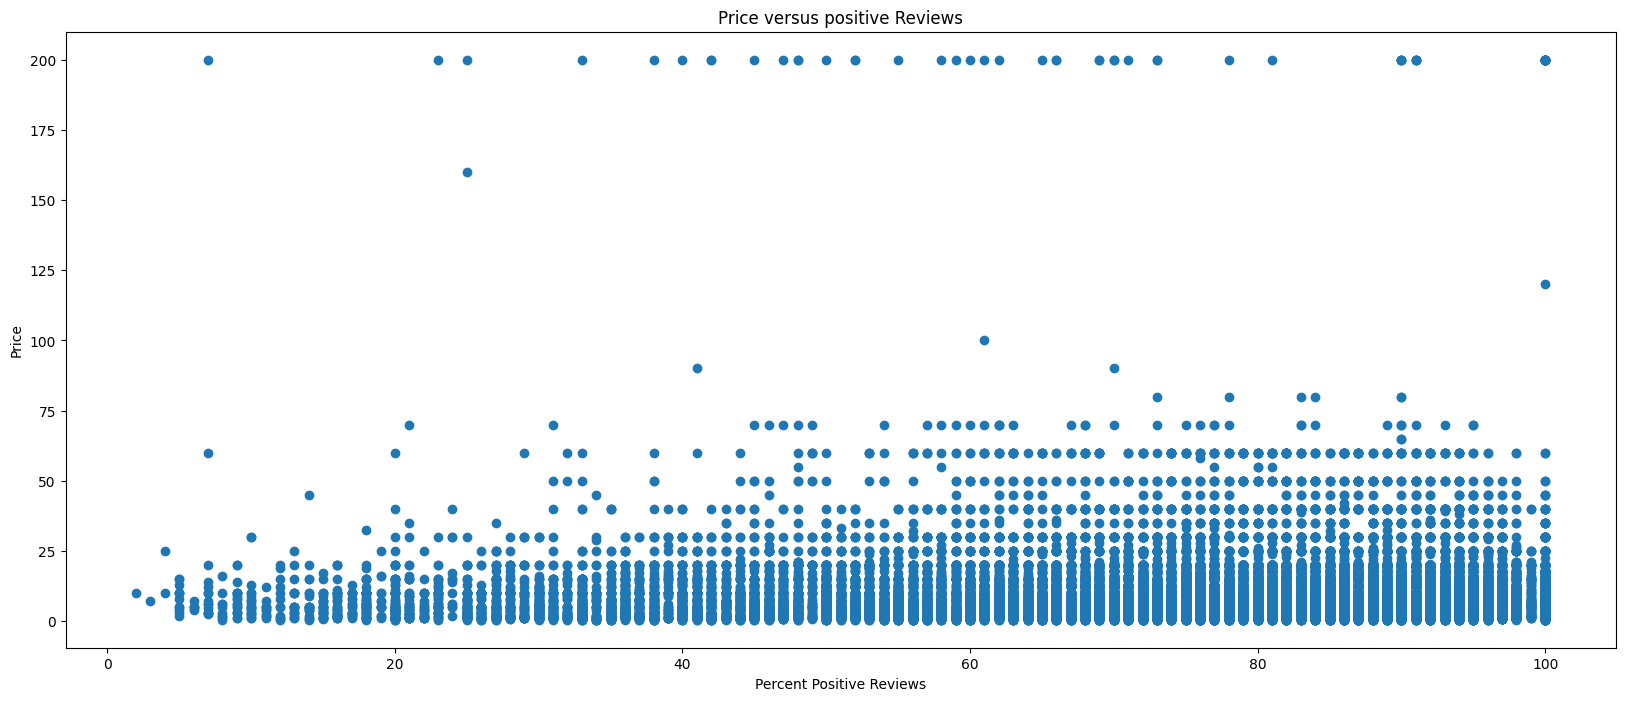

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(r_df['pct_pos_total'], r_df['price'])
ax.set_xlabel("Percent Positive Reviews")
ax.set_ylabel("Price")
ax.set_title("Price versus positive Reviews")

We can see that this graph benefitted massively from the normalization of our data. Which is important for so many individual points. We can tell on this graph though, there is an obvious trend within, where the density of points seems to increase towards the bottom left hand of the graph. Where the games are the least expensive, and the reviews are the highest.

## Predicting

So now that we have normalized data that excludes outliers, we can begin predicting, based on the price, how many reviews there will be, and at what percent will they be positive.


R2 Value: -0.0002890705448537201
Root Mean Squared Error: 17.907715641714006
R2 Value: 0.008852155010545815
Root Mean Squared Error: 26296.086099931614


Text(0.5, 0.98, 'Predicted vs. Actual')

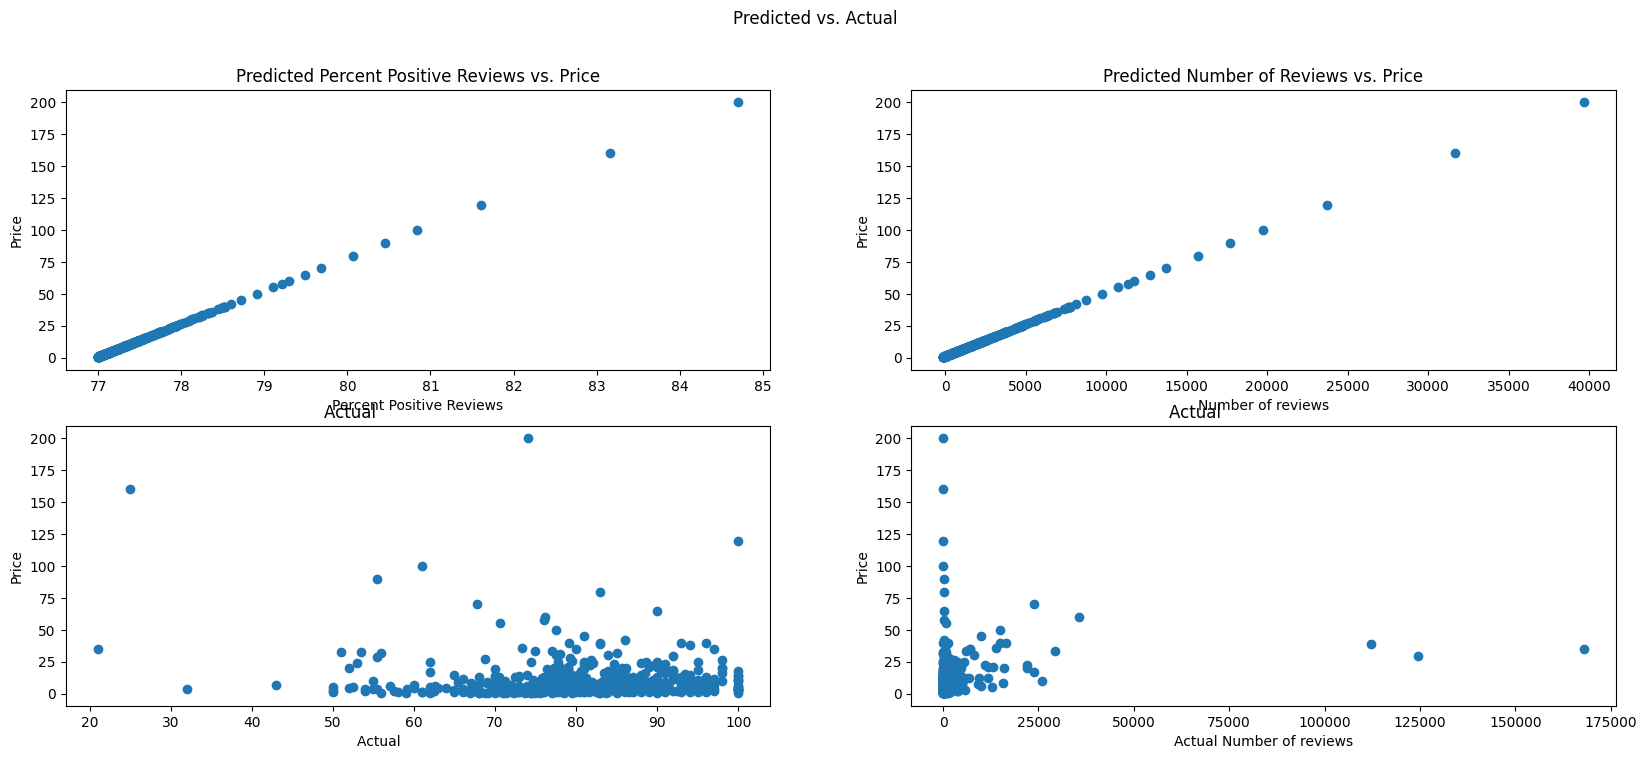

In [ ]:
#use linear regression for categorical variables function to get a linear model
price_by_pct_total = lin_reg_cat(r_df, 'price', 'pct_pos_total', 'mean', contains_list = False, print_r2=True)
price_by_tot_review = lin_reg_cat(r_df, 'price', 'num_reviews_total', 'mean', contains_list = False, print_r2 = True)

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 8))
ax1.scatter(price_by_pct_total['predicted pct_pos_total'], price_by_pct_total['price'])
ax1.set_title("Predicted Percent Positive Reviews vs. Price")
ax1.set_xlabel("Percent Positive Reviews")
ax1.set_ylabel("Price")

ax2.scatter(price_by_tot_review['predicted num_reviews_total'], price_by_tot_review['price'])
ax2.set_title("Predicted Number of Reviews vs. Price")
ax2.set_xlabel("Number of reviews")
ax2.set_ylabel("Price")

ax3.scatter(price_by_pct_total['actual pct_pos_total'], price_by_pct_total['price'])
ax3.set_title("Actual                          ")
ax3.set_xlabel("Actual                  ")
ax3.set_ylabel("Price")

ax4.scatter(price_by_tot_review['actual num_reviews_total'], price_by_tot_review['price'])
ax4.set_title("Actual                          ")
ax4.set_xlabel("Actual Number of reviews")
ax4.set_ylabel("Price")

fig1.suptitle('Predicted vs. Actual')

## Conclusion

We can see from the graphs that we've created, that the anti-hypothesis is true. The games do get reviewed more based on how much they cost. That being said, there isn't an exact number that we can dial in that will tell us that it will get reviewed the most. This is because games get reviewed the most on both ends of the spectrum. We can see an influx of games getting the most reviews when they are free, which makes sense because there is a larger populus that is able to play the game. Yet, we can also see that the most expensive games get reviewed higher than the rest. This can be because of a number of factors. Whether it be the developers had more money to create a better game for their users, or the users feel more obligated to review the game because they paid more money for it. Either way, the amount of money does affect how much users review the game, and whether they review it positively or not.

# Analyzing Price and Genres

Hypothesis

$H_0$: The genre will not affect the price of the game and all genres will have a similar price.

$H_A$: The genre does affect the price of the game and every genre will have a varying price.

In [ ]:
#create a new df for genre grouping
df_by_genre = df.copy()

In [ ]:
#since the genres column contains a list of genres, we need to explode df to get individual genres
df_by_genre['genres'] = df_by_genre['genres'].apply(literal_eval) #this makes sure explode evaluates genres as a list of strings
df_by_genre = df_by_genre.explode('genres')

Plot Original Data by Count

In [ ]:
#group by genres and get count of number of games in each genre
gamecount_by_genre = df_by_genre.groupby('genres')['name'].count().sort_values()
gamecount_by_genre.head()

,name
genres,
360 Video,1
Documentary,1
Episodic,1
Short,1
Tutorial,1


/tmp/ipython-input-3223843154.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(gamecount_by_genre.index, rotation=60)


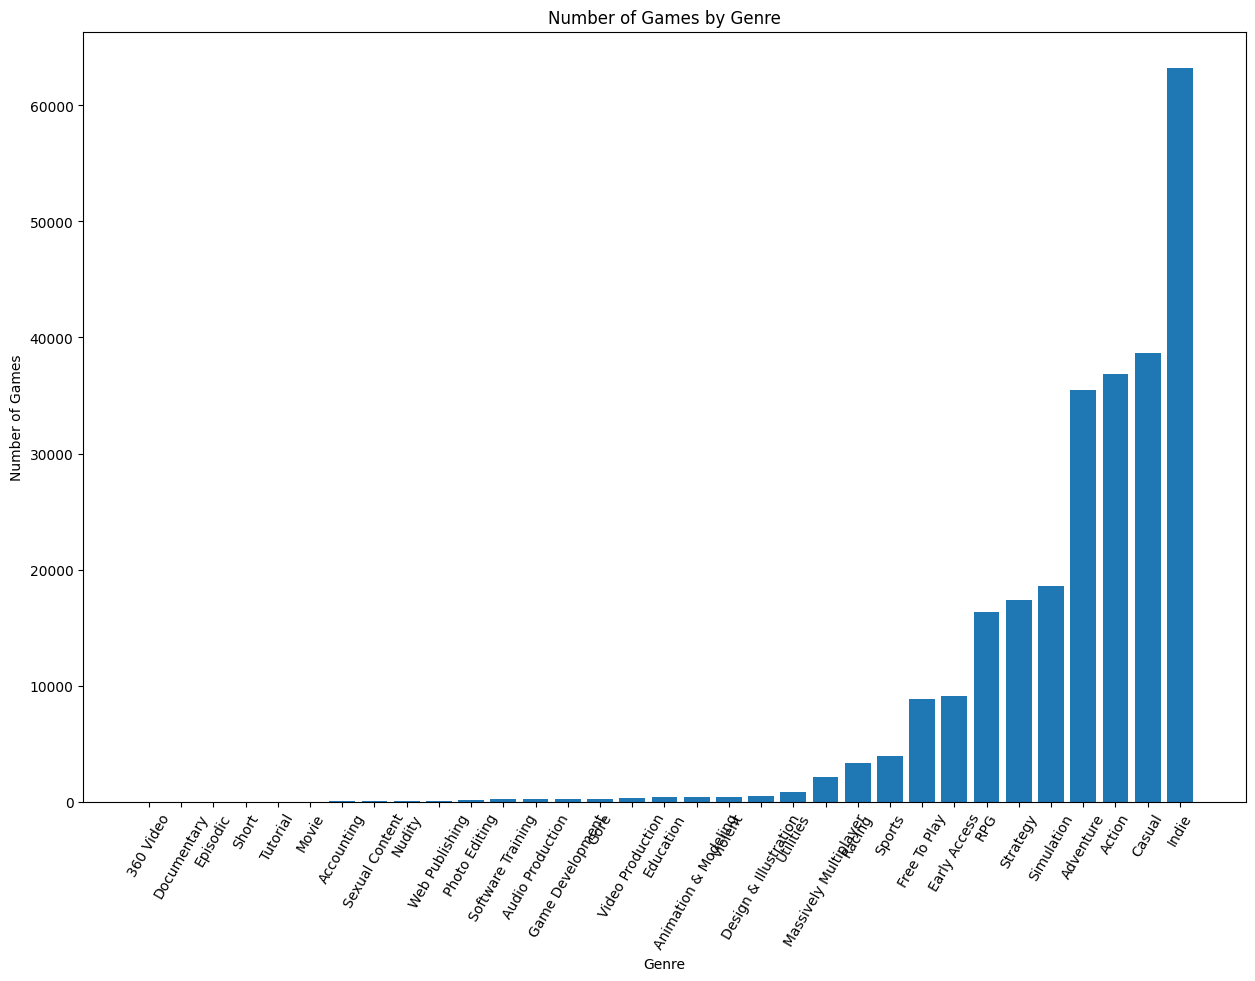

In [ ]:
#plot gamecount by genre
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(gamecount_by_genre.index, gamecount_by_genre.values)
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Games')
ax.set_title('Number of Games by Genre')
ax.set_xticklabels(gamecount_by_genre.index, rotation=60)

plt.show()

Plot Original Data by Playtime

In [ ]:
#group genres by playtime and get average playtime
playtime_by_genre = df_by_genre.groupby('genres')['average_playtime_forever'].mean().sort_values()
playtime_by_genre.head()

,average_playtime_forever
genres,
360 Video,0.0
Documentary,0.0
Episodic,0.0
Short,0.0
Tutorial,0.0


/tmp/ipython-input-3323219294.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(playtime_by_genre.index, rotation=60)


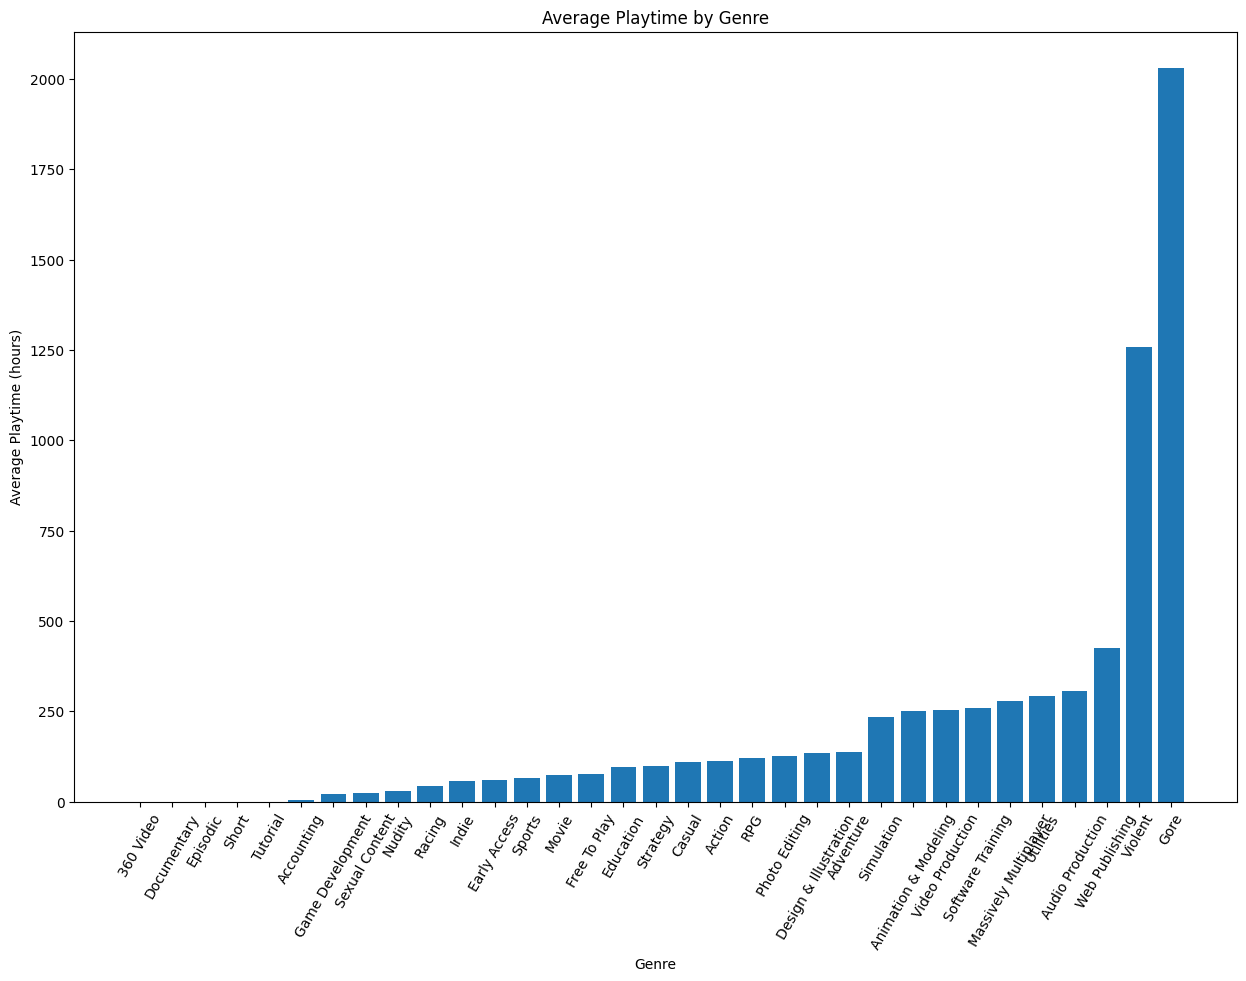

In [ ]:
#plot avg playtime by genre
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(playtime_by_genre.index, playtime_by_genre.values)
ax.set_xlabel('Genre')
ax.set_ylabel('Average Playtime (hours)')
ax.set_title('Average Playtime by Genre')
ax.set_xticklabels(playtime_by_genre.index, rotation=60)

plt.show()


Plot Orginal Data by Average Price

In [ ]:
#group by genres and average price
price_by_genre = df_by_genre.groupby('genres')['price'].mean()
price_by_genre_sorted = price_by_genre.sort_values()
price_by_genre.head()

,price
genres,
360 Video,0.990000
Accounting,12.785833
Action,7.629016
Adventure,7.890603
Animation & Modeling,18.894467


/tmp/ipython-input-2214467383.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(price_by_genre_sorted.index, rotation=60)


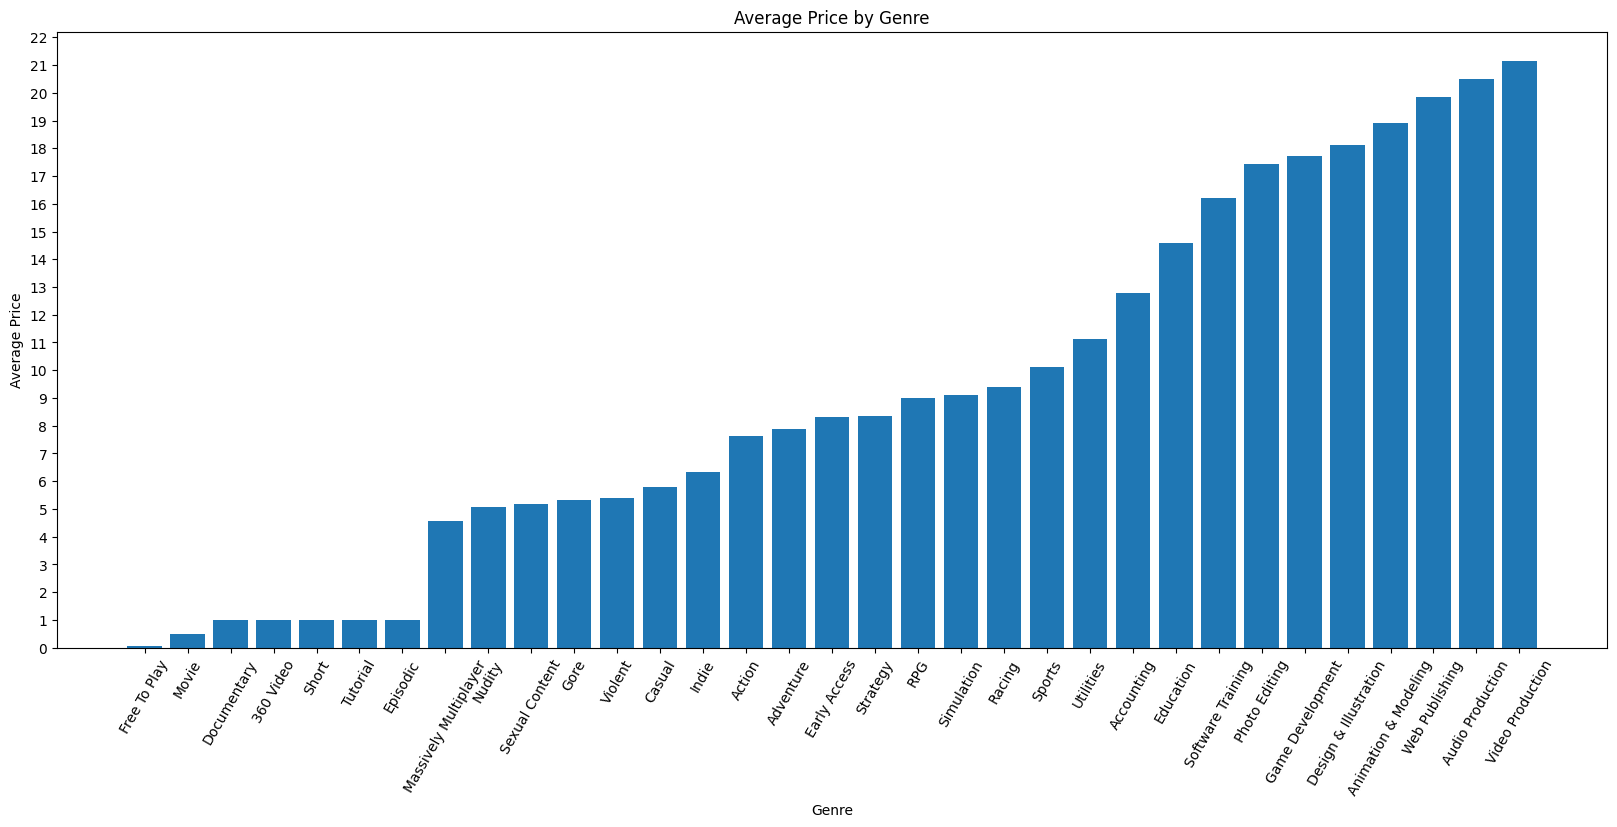

In [ ]:
#plot price by genre
fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(price_by_genre_sorted.index, price_by_genre_sorted.values)
ax.set_xlabel('Genre')
ax.set_xticklabels(price_by_genre_sorted.index, rotation=60)
ax.set_yticks(list(range(0, 23)))
ax.set_ylabel('Average Price')
ax.set_title('Average Price by Genre')

plt.show()

Clean Data by Filtering Price

In [ ]:
#with price being heavily skewed before grouping, lets filter out some of the outliers from price and replot the data
df_filtered = filter_outliers(df, ['price'])

In [ ]:
#create a new df for genre grouping for filtered data
df_by_genre = df_filtered.copy()

In [ ]:
#since the genres column contains a list of genres, we need to explode df to get individual genres
df_by_genre['genres'] = df_by_genre['genres'].apply(literal_eval) #this makes sure explode evaluates genres as a list of strings
df_by_genre = df_by_genre.explode('genres')

Plot Clean Data by Price

In [ ]:
#group by genres and average price
price_by_genre = df_by_genre.groupby('genres')['price'].mean()
price_by_genre_sorted = price_by_genre.sort_values()
price_by_genre.head()

,price
genres,
360 Video,0.990000
Accounting,7.660833
Action,6.587199
Adventure,6.988375
Animation & Modeling,9.007919


/tmp/ipython-input-3745308935.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(price_by_genre_sorted.index, rotation=60)


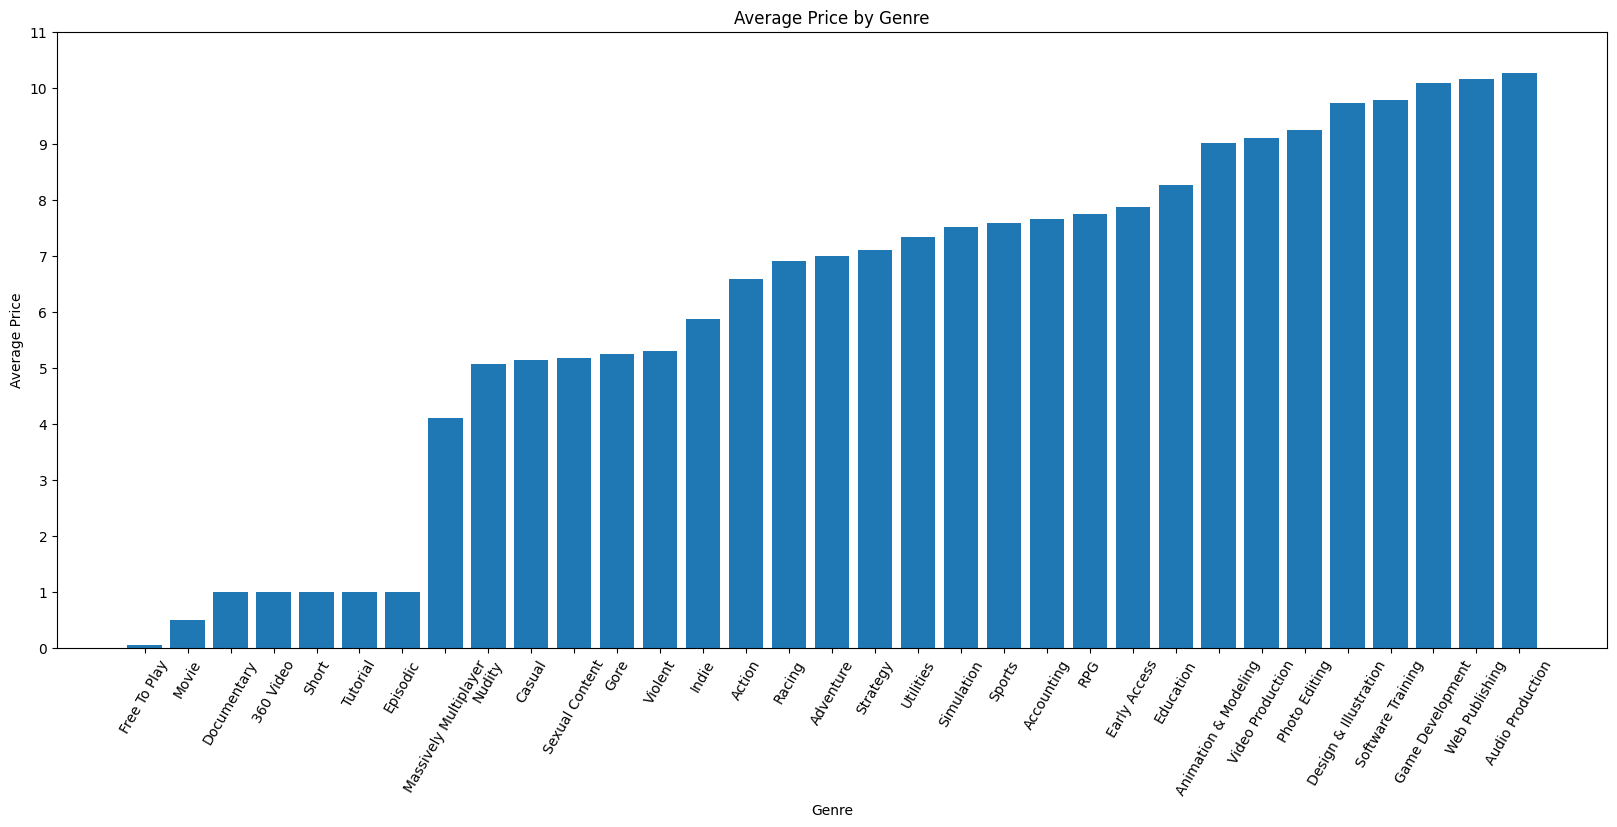

In [ ]:
#plot price by genre
fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(price_by_genre_sorted.index, price_by_genre_sorted.values)
ax.set_xlabel('Genre')
ax.set_xticklabels(price_by_genre_sorted.index, rotation=60)
ax.set_yticks(list(range(0, 12)))
ax.set_ylabel('Average Price')
ax.set_title('Average Price by Genre')

plt.show()

Create Linear Regression Model to Predict Price given Genre

In [ ]:
#use linear regression for categorical variables function to get a linear model
price_by_genre_pred = lin_reg_cat(df_filtered, 'genres', 'price', 'mean', contains_list=True, print_r2=True)
price_by_genre_pred
#***Note: R2 value is very low***

R2 Value: 0.0520777198704544
Root Mean Squared Error: 6.291096877020326


,genres,predicted price,actual price
0,Action,6.606517,6.587199
1,Free To Play,0.045044,0.051928
2,Adventure,6.983657,6.988375
3,Massively Multiplayer,4.226260,4.092967
4,Strategy,7.159926,7.108784
5,Indie,5.843881,5.871920
6,RPG,7.707786,7.750244
7,Casual,5.128394,5.139579
8,Simulation,7.535327,7.517112
9,Early Access,7.845476,7.862895


Plot Price Prediction Given Genre

/tmp/ipython-input-2247829426.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(price_by_genre_pred['genres'], rotation=60)


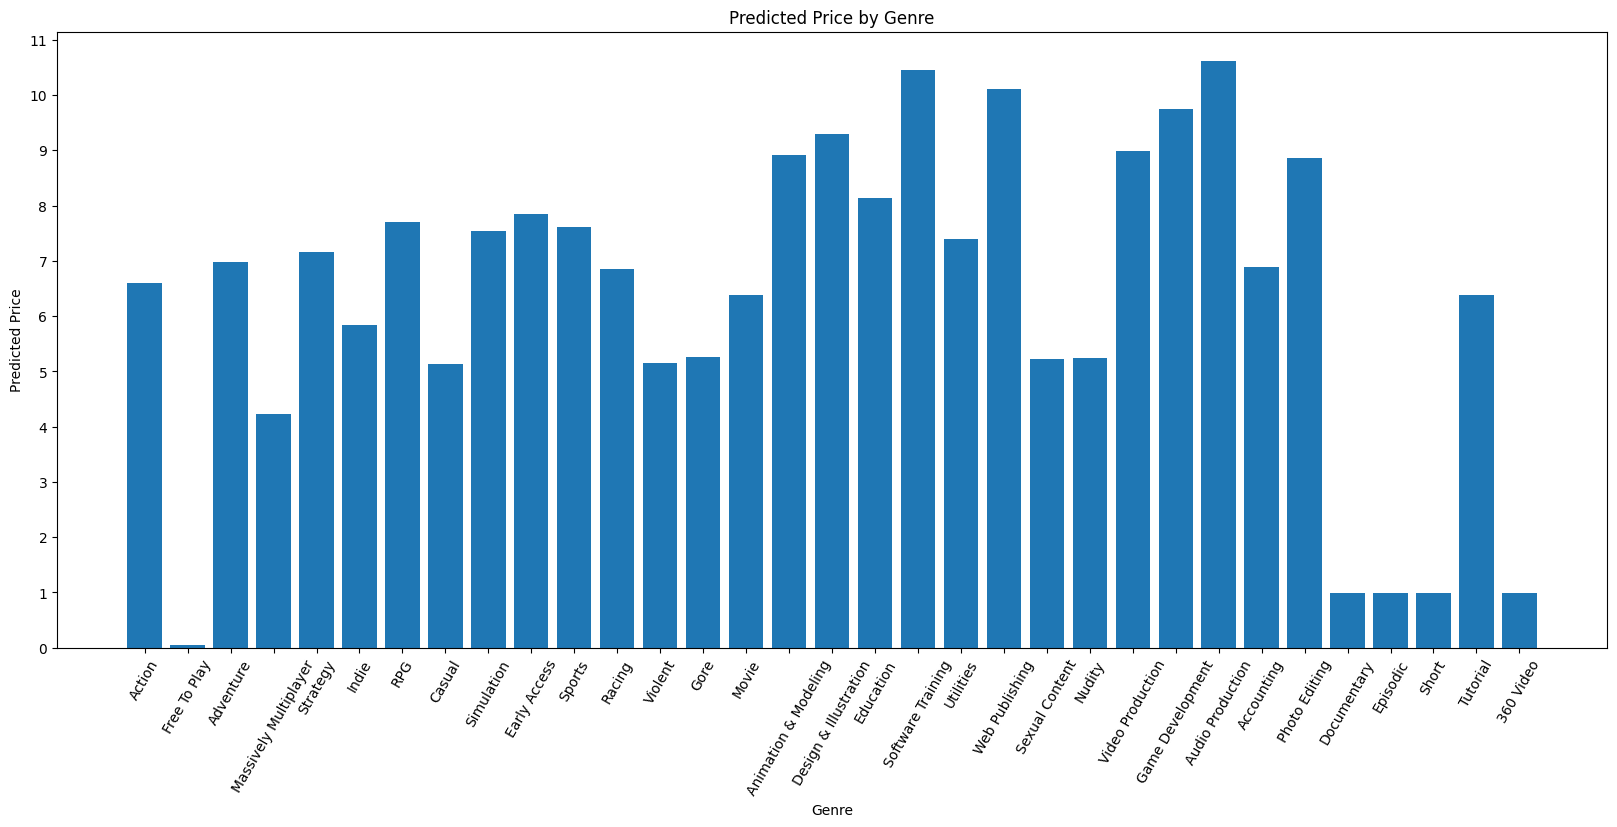

In [ ]:
#plot prediction of price given genre
fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(price_by_genre_pred['genres'], price_by_genre_pred['predicted price'])
ax.set_xlabel('Genre')
ax.set_xticklabels(price_by_genre_pred['genres'], rotation=60)
ax.set_yticks(list(range(0, 12)))
ax.set_ylabel('Predicted Price')
ax.set_title('Predicted Price by Genre')

plt.show()

Side-by-Side View of Price and Predicted Price by Genre

/tmp/ipython-input-2065212502.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(price_by_genre_pred['genres'], rotation=60)


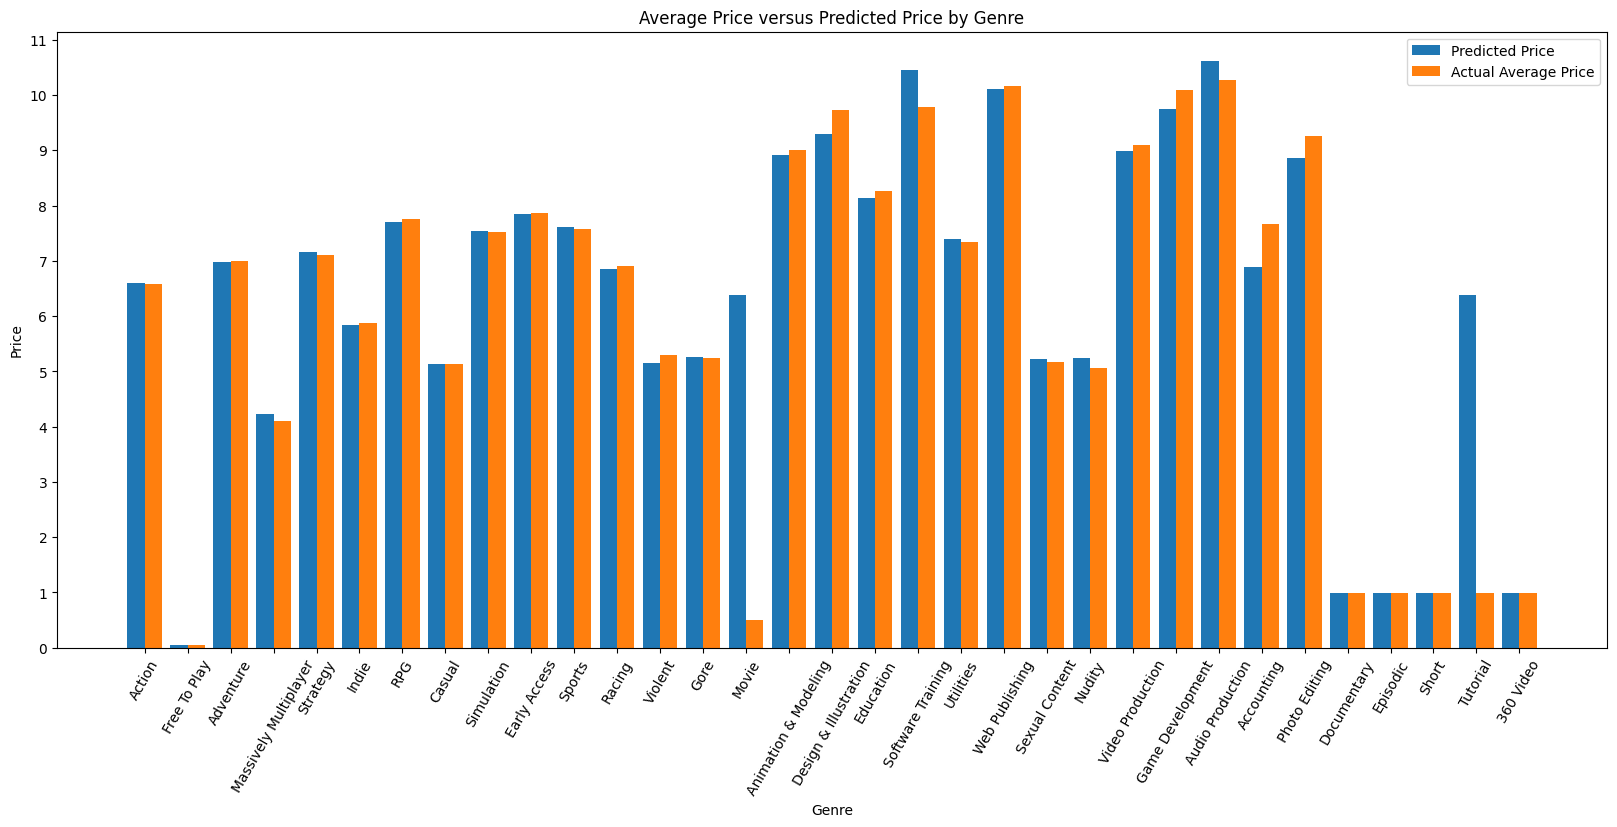

In [ ]:
#plot prediction of price given genre
fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(price_by_genre_pred['genres'], price_by_genre_pred['predicted price'], width=-0.4, align='edge', label='Predicted Price')
ax.bar(price_by_genre_pred['genres'], price_by_genre_pred['actual price'], width=0.4, align='edge', label='Actual Average Price')
ax.legend()
ax.set_xlabel('Genre')
ax.set_xticklabels(price_by_genre_pred['genres'], rotation=60)
ax.set_yticks(list(range(0, 12)))
ax.set_ylabel('Price')
ax.set_title('Average Price versus Predicted Price by Genre')

plt.show()

In [ ]:
filtered_df_genres = filtered_df.copy()
filtered_df_genres['genres'] = filtered_df_genres['genres'].apply(literal_eval)
filtered_df_genres = filtered_df_genres.explode('genres')

In [ ]:
#Fit the ANOVA model
model = ols('price_transformed ~ C(genres)', data=filtered_df_genres).fit()

#Perform the ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA Table (Testing for Price Differences Across Genres):")
print(anova_table)


ANOVA Table (Testing for Price Differences Across Genres):
                  sum_sq        df           F  PR(>F)
C(genres)   25103.386966      32.0  835.144663     0.0
Residual   242340.047304  257991.0         NaN     NaN


#Conclusion

Reject the null hypothesis. We can predict the average price of the game by the genre, but that price does not correlate with how the game should be priced. Need to look at other variables with pricing a game to get more of an accurate predict of price by genre.